In [1]:
import pandas as pd
import statistics as stats
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
healthcare_data=pd.read_csv('healthcare_dataset.csv')

In [3]:
healthcare_data.head()

Age        BMI  BloodPressure  Cholesterol  Glucose  Insulin  HeartRate  \
0   56  27.577099           88.0        108.0       92      171         75   
1   69  26.233744           88.0        252.0      102      179         71   
2   46  29.646620          152.0        141.0       89      198         90   
3   32  30.619597          106.0        273.0      159      222         64   
4   60  16.794395           96.0        172.0      173       30         99   

   Smoker PhysicalActivity  SleepTime  MedicalHistoryScore IncomeLevel  \
0       0           Medium          9                    5        High   
1       0             High          9                    3        High   
2       1              Low          5                    5      Medium   
3       1           Medium          7                    0      Medium   
4       1              Low          7                    3        High   

  StressLevel HealthIns    Disease  
0         Low        No  Disease_B  
1      Medium       Yes  Disease_A  
2      Medium        No  Disease_C  
3        High        No  Disease_C  
4      Medium        No  Disease_B

In [4]:
healthcare_data.tail()

Age        BMI  BloodPressure  Cholesterol  Glucose  Insulin  HeartRate  \
4995   42  32.859689          174.0        140.0      107      248         90   
4996   39  37.916078          113.0        184.0      180      200         98   
4997   48  32.637416          143.0        188.0       82       77         61   
4998   34  31.794482          108.0        141.0       76      117         71   
4999   72  24.858529           82.0        219.0      136      203         64   

      Smoker PhysicalActivity  SleepTime  MedicalHistoryScore IncomeLevel  \
4995       1             High         10                    9        High   
4996       1             High          8                    5        High   
4997       1             High          4                    1      Medium   
4998       1             High          4                    2         Low   
4999       1             High          4                    0         Low   

     StressLevel HealthIns    Disease  
4995        High        No  Disease_B  
4996         Low        No  Disease_C  
4997        High       Yes  Disease_C  
4998      Medium        No        NaN  
4999        High       Yes  Disease_C

In [5]:
healthcare_data.shape

(5000, 15)

### Central Tendency Measures and Stats techniques
between line 6 to 65

In [6]:
healthcare_data.describe()

Age          BMI  BloodPressure  Cholesterol      Glucose  \
count  5000.000000  4750.000000    4750.000000  4750.000000  5000.000000   
mean     48.805600    27.332873     129.749053   199.611158   137.440600   
std      17.906991     7.190172      28.671508    58.173633    47.448072   
min      18.000000    15.000291      80.000000   100.000000    70.000000   
25%      34.000000    21.049709     105.000000   149.000000   103.000000   
50%      49.000000    27.218082     130.000000   201.000000   136.000000   
75%      64.000000    33.530189     155.000000   250.000000   167.000000   
max      79.000000    39.988943     179.000000   299.000000   582.000000   

           Insulin    HeartRate       Smoker    SleepTime  MedicalHistoryScore  
count  5000.000000  5000.000000  5000.000000  5000.000000          5000.000000  
mean    146.573200    80.342000     0.510400     7.482200             4.485400  
std      82.623127    13.914919     0.499942     2.281562             2.852405  
min      15.000000    60.000000     0.000000     4.000000             0.000000  
25%      78.000000    70.000000     0.000000     5.000000             2.000000  
50%     144.000000    80.000000     1.000000     7.000000             4.000000  
75%     213.000000    89.000000     1.000000     9.000000             7.000000  
max     744.000000   198.000000     1.000000    11.000000             9.000000

In [7]:
healthcare_data.describe(include='all')

Age          BMI  BloodPressure  Cholesterol      Glucose  \
count   5000.000000  4750.000000    4750.000000  4750.000000  5000.000000   
unique          NaN          NaN            NaN          NaN          NaN   
top             NaN          NaN            NaN          NaN          NaN   
freq            NaN          NaN            NaN          NaN          NaN   
mean      48.805600    27.332873     129.749053   199.611158   137.440600   
std       17.906991     7.190172      28.671508    58.173633    47.448072   
min       18.000000    15.000291      80.000000   100.000000    70.000000   
25%       34.000000    21.049709     105.000000   149.000000   103.000000   
50%       49.000000    27.218082     130.000000   201.000000   136.000000   
75%       64.000000    33.530189     155.000000   250.000000   167.000000   
max       79.000000    39.988943     179.000000   299.000000   582.000000   

            Insulin    HeartRate       Smoker PhysicalActivity    SleepTime  \
count   5000.000000  5000.000000  5000.000000             5000  5000.000000   
unique          NaN          NaN          NaN                3          NaN   
top             NaN          NaN          NaN           Medium          NaN   
freq            NaN          NaN          NaN             1748          NaN   
mean     146.573200    80.342000     0.510400              NaN     7.482200   
std       82.623127    13.914919     0.499942              NaN     2.281562   
min       15.000000    60.000000     0.000000              NaN     4.000000   
25%       78.000000    70.000000     0.000000              NaN     5.000000   
50%      144.000000    80.000000     1.000000              NaN     7.000000   
75%      213.000000    89.000000     1.000000              NaN     9.000000   
max      744.000000   198.000000     1.000000              NaN    11.000000   

        MedicalHistoryScore IncomeLevel StressLevel HealthIns    Disease  
count           5000.000000        5000        5000      5000       3742  
unique                  NaN           3           3         2          3  
top                     NaN         Low         Low       Yes  Disease_B  
freq                    NaN        1681        1696      2506       1258  
mean               4.485400         NaN         NaN       NaN        NaN  
std                2.852405         NaN         NaN       NaN        NaN  
min                0.000000         NaN         NaN       NaN        NaN  
25%                2.000000         NaN         NaN       NaN        NaN  
50%                4.000000         NaN         NaN       NaN        NaN  
75%                7.000000         NaN         NaN       NaN        NaN  
max                9.000000         NaN         NaN       NaN        NaN

In [8]:
healthcare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   BMI                  4750 non-null   float64
 2   BloodPressure        4750 non-null   float64
 3   Cholesterol          4750 non-null   float64
 4   Glucose              5000 non-null   int64  
 5   Insulin              5000 non-null   int64  
 6   HeartRate            5000 non-null   int64  
 7   Smoker               5000 non-null   int64  
 8   PhysicalActivity     5000 non-null   object 
 9   SleepTime            5000 non-null   int64  
 10  MedicalHistoryScore  5000 non-null   int64  
 11  IncomeLevel          5000 non-null   object 
 12  StressLevel          5000 non-null   object 
 13  HealthIns            5000 non-null   object 
 14  Disease              3742 non-null   object 
dtypes: float64(3), int64(7), object(5)
mem

## Cleaning Data

In [9]:
healthcare_data.isnull().values.any()

True

In [10]:
healthcare_data.isnull().sum()

Age                       0
BMI                     250
BloodPressure           250
Cholesterol             250
Glucose                   0
Insulin                   0
HeartRate                 0
Smoker                    0
PhysicalActivity          0
SleepTime                 0
MedicalHistoryScore       0
IncomeLevel               0
StressLevel               0
HealthIns                 0
Disease                1258
dtype: int64

In [11]:
columns_with_nan = healthcare_data.columns[healthcare_data.isna().any()].tolist()
print(columns_with_nan)

['BMI', 'BloodPressure', 'Cholesterol', 'Disease']


### BMI

In [12]:
healthcare_data['BMI'].unique()

array([27.57709877, 26.23374355, 29.64661971, ..., 32.6374163 ,
       31.79448176, 24.85852866])

In [13]:
BMI_healthcare_data_mean = healthcare_data['BMI'].mean()
BMI_healthcare_data_mean

27.3328732952

In [14]:
healthcare_data['BMI'] = healthcare_data['BMI'].fillna(BMI_healthcare_data_mean)
healthcare_data['BMI']

0       27.577099
1       26.233744
2       29.646620
3       30.619597
4       16.794395
          ...    
4995    32.859689
4996    37.916078
4997    32.637416
4998    31.794482
4999    24.858529
Name: BMI, Length: 5000, dtype: float64

In [15]:
BMI_counts = healthcare_data['BMI'].value_counts()
BMI_counts

BMI
27.332873    250
27.577099      1
38.164635      1
31.660183      1
39.614397      1
            ... 
23.482632      1
16.550919      1
24.445980      1
39.233045      1
24.858529      1
Name: count, Length: 4751, dtype: int64

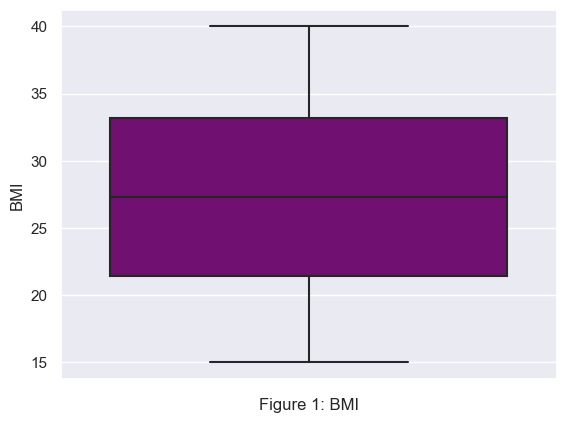

In [16]:
color = 'purple'
High_Value_Purchase_Count_outlier = healthcare_data['BMI']

sns.boxplot(y=High_Value_Purchase_Count_outlier, color=color)
plt.xlabel('Figure 1: BMI')

plt.show()

### BloodPressure

In [17]:
healthcare_data['BloodPressure'].unique()

array([ 88., 152., 106.,  96.,  nan, 124.,  87., 159.,  97., 112.,  80.,
       155.,  85., 120., 134.,  84., 138., 128., 161., 144., 162., 133.,
       140.,  82., 104., 148., 119., 129., 174., 136.,  95., 117.,  86.,
       157., 132., 142., 168., 111., 101., 131., 143., 170.,  92., 151.,
       135.,  91., 178., 165., 108., 118., 179., 177., 125., 146.,  93.,
       102., 173.,  89., 156., 160., 166.,  81., 175., 122.,  83., 167.,
        98., 164., 145., 116., 158., 126., 115., 105., 110., 176., 150.,
       114.,  94., 172., 109., 154., 139., 153., 171., 169., 163., 147.,
       149., 130., 127., 107., 103., 123., 121., 141., 100.,  90.,  99.,
       113., 137.])

In [18]:
BloodPressure_healthcare_data_mean = healthcare_data['BloodPressure'].mean()
BloodPressure_healthcare_data_mean

129.74905263157893

In [19]:
healthcare_data['BloodPressure'] = healthcare_data['BloodPressure'].fillna(BloodPressure_healthcare_data_mean)
healthcare_data['BloodPressure']

0        88.0
1        88.0
2       152.0
3       106.0
4        96.0
        ...  
4995    174.0
4996    113.0
4997    143.0
4998    108.0
4999     82.0
Name: BloodPressure, Length: 5000, dtype: float64

In [20]:
BloodPressure_counts = healthcare_data['BloodPressure'].value_counts()
BloodPressure_counts

BloodPressure
129.749053    250
127.000000     67
159.000000     66
165.000000     65
92.000000      64
             ... 
137.000000     35
177.000000     34
90.000000      33
128.000000     31
154.000000     28
Name: count, Length: 101, dtype: int64

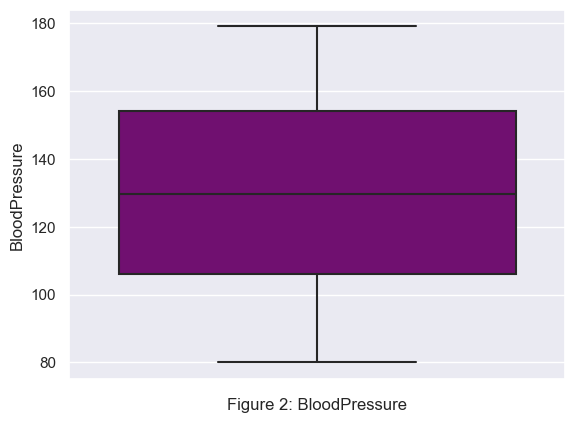

In [21]:
color = 'Purple'
High_Value_Purchase_Count_outlier = healthcare_data['BloodPressure']

sns.boxplot(y=High_Value_Purchase_Count_outlier, color=color)
plt.xlabel('Figure 2: BloodPressure')

plt.show()

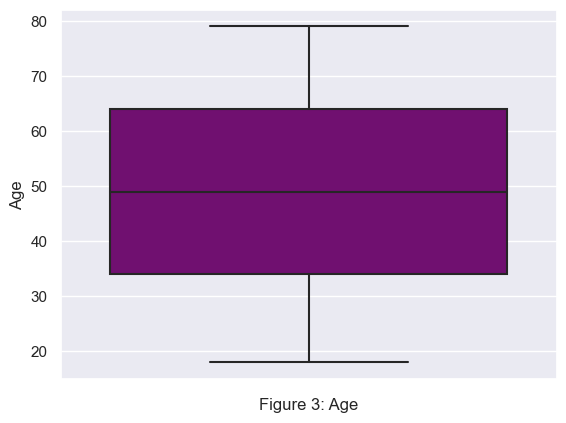

In [22]:
color = 'Purple'
High_Value_Purchase_Count_outlier = healthcare_data['Age']

sns.boxplot(y=High_Value_Purchase_Count_outlier, color=color)
plt.xlabel('Figure 3: Age')

plt.show()

In [23]:
healthcare_data['Cholesterol'].unique()

array([108., 252., 141., 273., 172., 183.,  nan, 120., 249., 256., 162.,
       160., 163., 168., 267., 228., 205., 164., 221., 161., 281., 202.,
       159., 145., 104., 212., 280., 169., 259., 110., 237., 266., 197.,
       130., 111., 207., 179., 265., 166., 293., 151., 232., 238., 124.,
       134., 262., 121., 264., 282., 195., 216., 291., 119., 103., 117.,
       150., 295., 236., 253., 201., 268., 158., 144., 140., 137., 118.,
       113., 226., 248., 242., 102., 136., 115., 241., 106., 233., 114.,
       279., 171., 261., 203., 214., 296., 247., 234., 149., 229., 146.,
       288., 217., 135., 178., 155., 116., 283., 245., 272., 157., 175.,
       109., 184., 230., 182., 208., 143., 297., 231., 192., 271., 219.,
       167., 165., 289., 257., 278., 187., 275., 132., 204., 173., 181.,
       246., 215., 186., 174., 112., 287., 299., 298., 101., 129., 176.,
       276., 213., 122., 196., 199., 154., 294., 107., 227., 131., 152.,
       209., 191., 255., 286., 277., 127., 270., 26

In [24]:
Cholesterol_healthcare_data_mean = healthcare_data['Cholesterol'].mean()
Cholesterol_healthcare_data_mean

199.61115789473683

In [25]:
healthcare_data['Cholesterol'] = healthcare_data['Cholesterol'].fillna(Cholesterol_healthcare_data_mean)
healthcare_data['Cholesterol']

0       108.0
1       252.0
2       141.0
3       273.0
4       172.0
        ...  
4995    140.0
4996    184.0
4997    188.0
4998    141.0
4999    219.0
Name: Cholesterol, Length: 5000, dtype: float64

In [26]:
Cholesterol_counts = healthcare_data['Cholesterol'].value_counts()
Cholesterol_counts

Cholesterol
199.611158    250
271.000000     39
114.000000     39
130.000000     36
211.000000     36
             ... 
239.000000     15
193.000000     15
238.000000     14
200.000000     13
110.000000      8
Name: count, Length: 201, dtype: int64

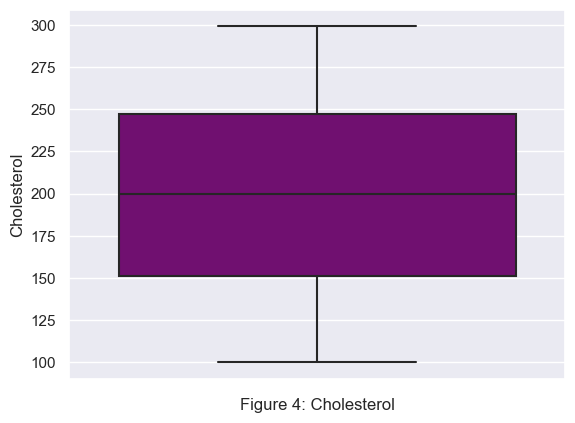

In [27]:
color = 'Purple'
High_Value_Purchase_Count_outlier = healthcare_data['Cholesterol']

sns.boxplot(y=High_Value_Purchase_Count_outlier, color=color)
plt.xlabel('Figure 4: Cholesterol')

plt.show()

In [28]:
healthcare_data['Disease'].unique()

array(['Disease_B', 'Disease_A', 'Disease_C', nan], dtype=object)

In [29]:
Disease_counts = healthcare_data['Disease'].value_counts()
Disease_counts

Disease
Disease_B    1258
Disease_A    1242
Disease_C    1242
Name: count, dtype: int64

In [30]:
healthcare_data['Disease'].fillna('Disease_Unknown', inplace=True)

In [31]:
Disease_counts = healthcare_data['Disease'].value_counts()
Disease_counts

Disease
Disease_B          1258
Disease_Unknown    1258
Disease_A          1242
Disease_C          1242
Name: count, dtype: int64

In [32]:
relative_frequencies_Disease = Disease_counts/len(healthcare_data)
relative_frequencies_Disease

Disease
Disease_B          0.2516
Disease_Unknown    0.2516
Disease_A          0.2484
Disease_C          0.2484
Name: count, dtype: float64

In [33]:
pd.DataFrame({'Disease': Disease_counts.index,
                        'Frequency': Disease_counts.values,
                        'Relative Frequency': relative_frequencies_Disease.values})

Disease  Frequency  Relative Frequency
0        Disease_B       1258              0.2516
1  Disease_Unknown       1258              0.2516
2        Disease_A       1242              0.2484
3        Disease_C       1242              0.2484

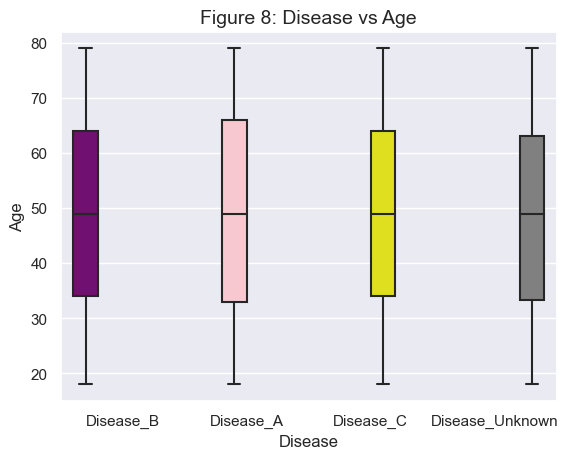

In [34]:
palette = ['purple', 'pink', 'yellow', 'grey']

sns.boxplot(x = 'Disease', y = 'Age', data = healthcare_data, hue = 'Disease', palette=palette)
plt.title('Figure 8: Disease vs Age', fontsize = 14)
plt.legend([], [],frameon = False)
plt.show()

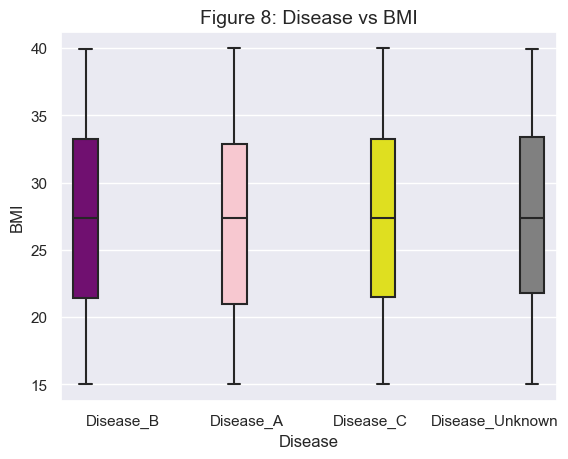

In [35]:
palette = ['purple', 'pink', 'yellow', 'grey']

sns.boxplot(x = 'Disease', y = 'BMI', data = healthcare_data, hue = 'Disease', palette=palette)
plt.title('Figure 8: Disease vs BMI', fontsize = 14)
plt.legend([], [],frameon = False)
plt.show()

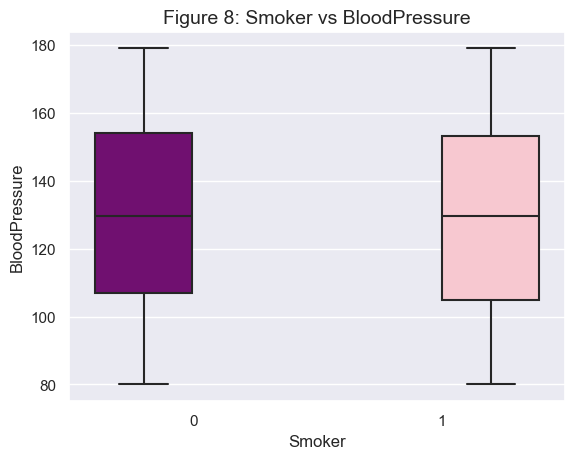

In [36]:
palette = ['purple', 'pink', 'yellow', 'grey']

sns.boxplot(x = 'Smoker', y = 'BloodPressure', data = healthcare_data, hue = 'Smoker', palette=palette)
plt.title('Figure 8: Smoker vs BloodPressure', fontsize = 14)
plt.legend([], [],frameon = False)
plt.show()

In [37]:
healthcare_data.describe(include='object')

PhysicalActivity IncomeLevel StressLevel HealthIns    Disease
count              5000        5000        5000      5000       5000
unique                3           3           3         2          4
top              Medium         Low         Low       Yes  Disease_B
freq               1748        1681        1696      2506       1258

### HealthIns

In [38]:
healthcare_data['HealthIns'].unique()

array(['No', 'Yes'], dtype=object)

In [39]:
HealthIns_counts = healthcare_data['HealthIns'].value_counts()
HealthIns_counts

HealthIns
Yes    2506
No     2494
Name: count, dtype: int64

In [40]:
relative_frequencies_HealthIns = HealthIns_counts/len(healthcare_data)
relative_frequencies_HealthIns

HealthIns
Yes    0.5012
No     0.4988
Name: count, dtype: float64

In [41]:
pd.DataFrame({'HealthIns': HealthIns_counts.index,
                        'Frequency': HealthIns_counts.values,
                        'Relative Frequency': relative_frequencies_HealthIns.values})

HealthIns  Frequency  Relative Frequency
0       Yes       2506              0.5012
1        No       2494              0.4988

### PhysicalActivity

In [42]:
healthcare_data['PhysicalActivity'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [43]:
HealthIns_counts = healthcare_data['PhysicalActivity'].value_counts()
HealthIns_counts

PhysicalActivity
Medium    1748
High      1635
Low       1617
Name: count, dtype: int64

In [44]:
relative_frequencies_PhysicalActivity = HealthIns_counts/len(healthcare_data)
relative_frequencies_PhysicalActivity

PhysicalActivity
Medium    0.3496
High      0.3270
Low       0.3234
Name: count, dtype: float64

In [45]:
pd.DataFrame({'PhysicalActivity': HealthIns_counts.index,
                        'Frequency': HealthIns_counts.values,
                        'Relative Frequency': relative_frequencies_PhysicalActivity.values})

PhysicalActivity  Frequency  Relative Frequency
0           Medium       1748              0.3496
1             High       1635              0.3270
2              Low       1617              0.3234

In [46]:
def identify_variable_types(data):
    categorical_vars = []
    continuous_vars = []

    for var_name, var_data in data.items():
        # Check if the data type is string (categorical) or numeric (continuous)
        if isinstance(var_data[0], str):
            categorical_vars.append(var_name)
        else:
            continuous_vars.append(var_name)

    return categorical_vars, continuous_vars

data = {
    'Age': [25, 30, 45, 40, 50],
    'BMI': [22.5, 24.0, 28.1, 26.7, 30.2],
    'BloodPressure': [120, 125, 130, 128, 135],
    'Cholesterol': [200, 195, 210, 205, 215],
    'Glucose': [85, 90, 95, 100, 105],
    'Insulin': [15, 20, 25, 30, 35],
    'HeartRate': [70, 75, 80, 85, 90],
    'Smoker': ['Yes', 'No'],
    'PhysicalActivity': ['Low', 'Medium', 'High', 'Low', 'Medium'],
    'SleepTime': [7, 6, 8, 5, 6],
    'MedicalHistoryScore': [2, 3, 1, 4, 2],
    'IncomeLevel': ['High', 'Medium', 'Low', 'Medium', 'High'],
    'StressLevel': ['Low', 'Medium', 'High', 'Low', 'High'],
    'HealthIns': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'Disease': ['Disease_A', 'Disease_B', 'Disease_C', 'Disease_Unknown']
}

categorical_vars, continuous_vars = identify_variable_types(data)
print("Categorical Variables:", categorical_vars)
print("Continuous Variables:", continuous_vars)

Categorical Variables: ['Smoker', 'PhysicalActivity', 'IncomeLevel', 'StressLevel', 'HealthIns', 'Disease']
Continuous Variables: ['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Glucose', 'Insulin', 'HeartRate', 'SleepTime', 'MedicalHistoryScore']


In [47]:
object_features_names = healthcare_data.select_dtypes(include=['object']).columns.tolist()
object_features_names

['PhysicalActivity', 'IncomeLevel', 'StressLevel', 'HealthIns', 'Disease']

In [48]:
healthcare_data.PhysicalActivity = healthcare_data.PhysicalActivity.map({"Low": 0, "Medium":1, "High":2})
healthcare_data.IncomeLevel = healthcare_data.IncomeLevel.map({"Low": 0, "Medium":1, "High":2})
healthcare_data.StressLevel = healthcare_data.StressLevel.map({"Low": 0, "Medium":1, "High":2})
healthcare_data["HealthIns"] = healthcare_data["HealthIns"].map({"No":0,"Yes":1})

### Standardization / LabelEncoder before to do the models:

In [49]:
from sklearn.preprocessing import LabelEncoder

def apply_label_encoding(dataframe, column_name):
 
    encoder = LabelEncoder()
    
    encoded_column = encoder.fit_transform(dataframe['Disease'])
    
    return encoded_column

In [50]:
encoded_disease = apply_label_encoding(healthcare_data, 'Disease')

healthcare_data['Disease_Encoded'] = encoded_disease

In [51]:
healthcare_data.drop(columns=['Disease'], inplace=True)

### OneHotEcoder:

In [52]:
healthcare_data.head()

Age        BMI  BloodPressure  Cholesterol  Glucose  Insulin  HeartRate  \
0   56  27.577099           88.0        108.0       92      171         75   
1   69  26.233744           88.0        252.0      102      179         71   
2   46  29.646620          152.0        141.0       89      198         90   
3   32  30.619597          106.0        273.0      159      222         64   
4   60  16.794395           96.0        172.0      173       30         99   

   Smoker  PhysicalActivity  SleepTime  MedicalHistoryScore  IncomeLevel  \
0       0                 1          9                    5            2   
1       0                 2          9                    3            2   
2       1                 0          5                    5            1   
3       1                 1          7                    0            1   
4       1                 0          7                    3            2   

   StressLevel  HealthIns  Disease_Encoded  
0            0          0                1  
1            1          1                0  
2            1          0                2  
3            2          0                2  
4            1          0                1

In [53]:
from sklearn.preprocessing import OneHotEncoder

y_series = pd.Series(['A', 'B', 'C', 'Unknown'])

y_array = y_series.to_numpy()

encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y_array.reshape(-1, 1)) 

new_columns = encoder.get_feature_names_out(['Disease_Encoded'])

y_encoded_df = pd.DataFrame(y_encoded.toarray(), columns=new_columns)

y_new = y_encoded_df[new_columns]

print(y_new.head())

   Disease_Encoded_A  Disease_Encoded_B  Disease_Encoded_C  \
0                1.0                0.0                0.0   
1                0.0                1.0                0.0   
2                0.0                0.0                1.0   
3                0.0                0.0                0.0   

   Disease_Encoded_Unknown  
0                      0.0  
1                      0.0  
2                      0.0  
3                      1.0  


In [54]:
healthcare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   BMI                  5000 non-null   float64
 2   BloodPressure        5000 non-null   float64
 3   Cholesterol          5000 non-null   float64
 4   Glucose              5000 non-null   int64  
 5   Insulin              5000 non-null   int64  
 6   HeartRate            5000 non-null   int64  
 7   Smoker               5000 non-null   int64  
 8   PhysicalActivity     5000 non-null   int64  
 9   SleepTime            5000 non-null   int64  
 10  MedicalHistoryScore  5000 non-null   int64  
 11  IncomeLevel          5000 non-null   int64  
 12  StressLevel          5000 non-null   int64  
 13  HealthIns            5000 non-null   int64  
 14  Disease_Encoded      5000 non-null   int32  
dtypes: float64(3), int32(1), int64(11)
mem

In [55]:
healthcare_data.describe()

Age          BMI  BloodPressure  Cholesterol      Glucose  \
count  5000.000000  5000.000000    5000.000000  5000.000000  5000.000000   
mean     48.805600    27.332873     129.749053   199.611158   137.440600   
std      17.906991     7.008076      27.945382    56.700345    47.448072   
min      18.000000    15.000291      80.000000   100.000000    70.000000   
25%      34.000000    21.398311     106.000000   151.000000   103.000000   
50%      49.000000    27.332873     129.749053   199.611158   136.000000   
75%      64.000000    33.181997     154.000000   247.000000   167.000000   
max      79.000000    39.988943     179.000000   299.000000   582.000000   

           Insulin    HeartRate       Smoker  PhysicalActivity    SleepTime  \
count  5000.000000  5000.000000  5000.000000       5000.000000  5000.000000   
mean    146.573200    80.342000     0.510400          1.003600     7.482200   
std      82.623127    13.914919     0.499942          0.806546     2.281562   
min      15.000000    60.000000     0.000000          0.000000     4.000000   
25%      78.000000    70.000000     0.000000          0.000000     5.000000   
50%     144.000000    80.000000     1.000000          1.000000     7.000000   
75%     213.000000    89.000000     1.000000          2.000000     9.000000   
max     744.000000   198.000000     1.000000          2.000000    11.000000   

       MedicalHistoryScore  IncomeLevel  StressLevel    HealthIns  \
count          5000.000000  5000.000000  5000.000000  5000.000000   
mean              4.485400     0.995800     0.986000     0.501200   
std               2.852405     0.817506     0.815069     0.500049   
min               0.000000     0.000000     0.000000     0.000000   
25%               2.000000     0.000000     0.000000     0.000000   
50%               4.000000     1.000000     1.000000     1.000000   
75%               7.000000     2.000000     2.000000     1.000000   
max               9.000000     2.000000     2.000000     1.000000   

       Disease_Encoded  
count      5000.000000  
mean          1.503200  
std           1.118141  
min           0.000000  
25%           1.000000  
50%           1.500000  
75%           3.000000  
max           3.000000

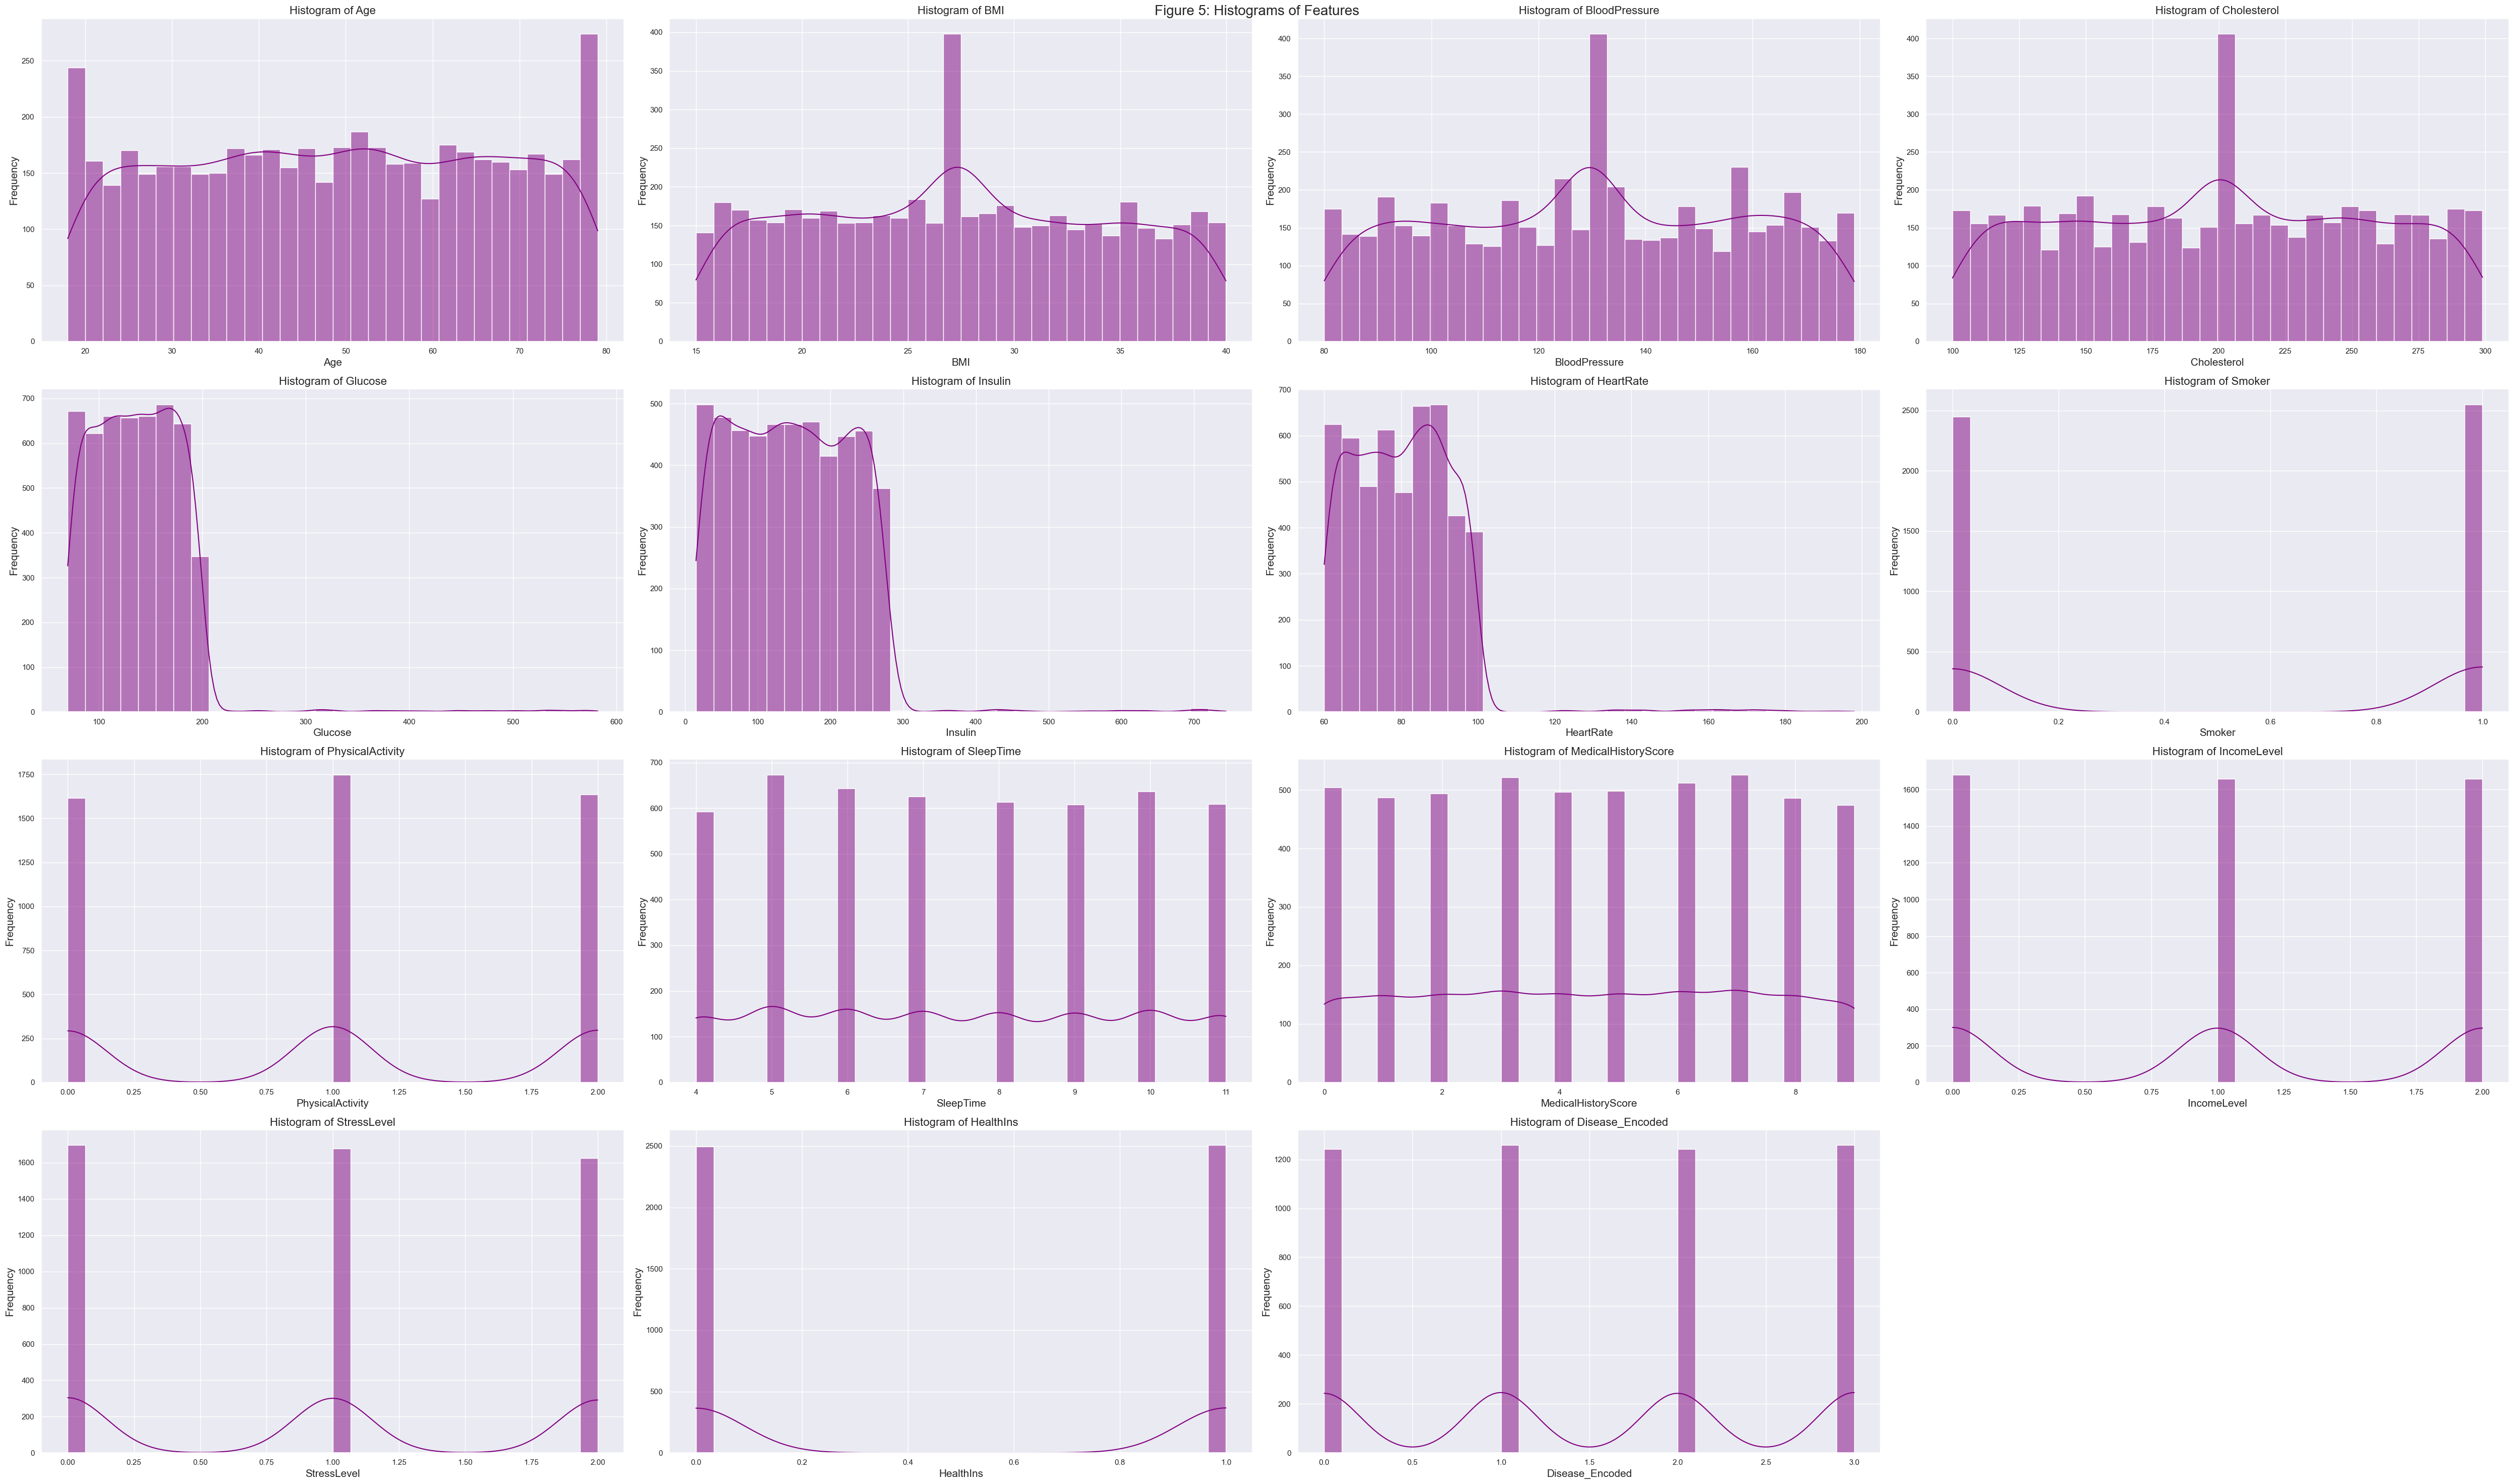

In [56]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

features = healthcare_data.columns.tolist()

num_features = len(features)
num_cols = 4
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(50, 30))  

axes = axes.flatten()

colors = ['purple'] 

for i, feature in enumerate(features):
    if i < num_features:  
        sns.histplot(healthcare_data[feature], kde=True, bins=30, color=colors[i % len(colors)], ax=axes[i])
        axes[i].set_title(f'Histogram of {feature}', fontsize=16)
        axes[i].set_xlabel(feature, fontsize=15)
        axes[i].set_ylabel('Frequency', fontsize=15)

for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axes[j])

plt.suptitle("Figure 5: Histograms of Features", fontsize=20)  

plt.tight_layout()

plt.show()

In [57]:
column_names = healthcare_data.columns.tolist()
print(column_names)

['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Glucose', 'Insulin', 'HeartRate', 'Smoker', 'PhysicalActivity', 'SleepTime', 'MedicalHistoryScore', 'IncomeLevel', 'StressLevel', 'HealthIns', 'Disease_Encoded']


In [58]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

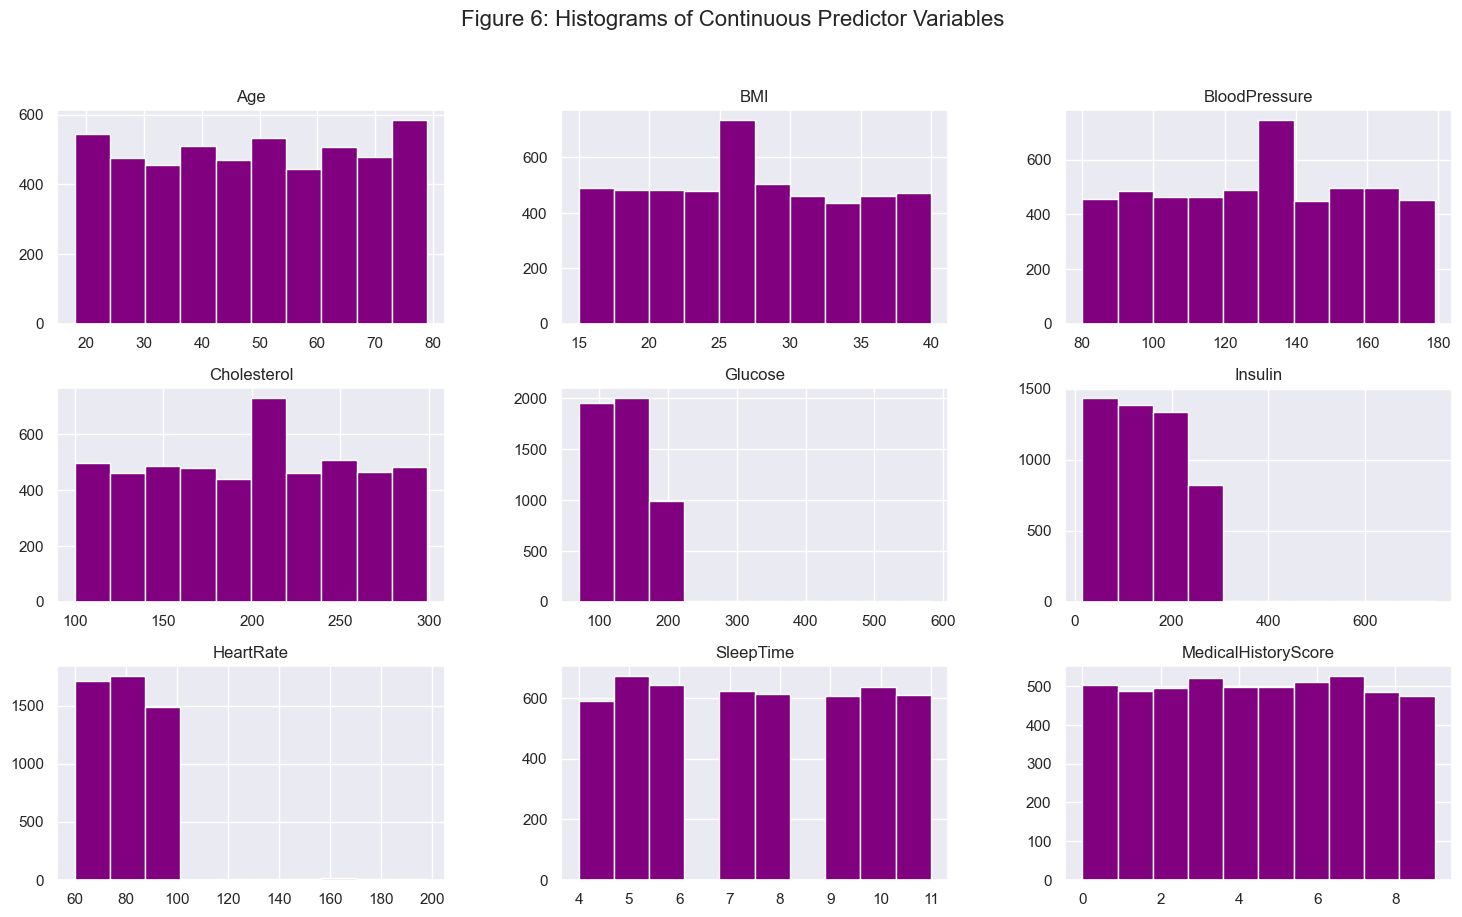

In [59]:
healthcare_data.hist(['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Glucose', 'Insulin', 'HeartRate', 'SleepTime', 'MedicalHistoryScore'], figsize=(18, 10), color='purple')
plt.suptitle('Figure 6: Histograms of Continuous Predictor Variables', fontsize=16)
plt.show()

## Training and Test:

In [60]:
X = healthcare_data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].values
y = healthcare_data.iloc[:, 14].values

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
y

array([1, 0, 2, ..., 2, 3, 2])

### Normalization

In [63]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [64]:
healthcare_data.shape

(5000, 15)

# LDA
#### Reduce the dimensionality:

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [66]:
lda=LinearDiscriminantAnalysis()
X_lda=lda.fit_transform(X,y)

In [67]:
X_lda.shape

(5000, 3)

In [68]:
import numpy as np

classes = np.unique(y)
num_classes = len(classes)

print("number of classes:", num_classes)
print("Classes:", classes)

number of classes: 4
Classes: [0 1 2 3]


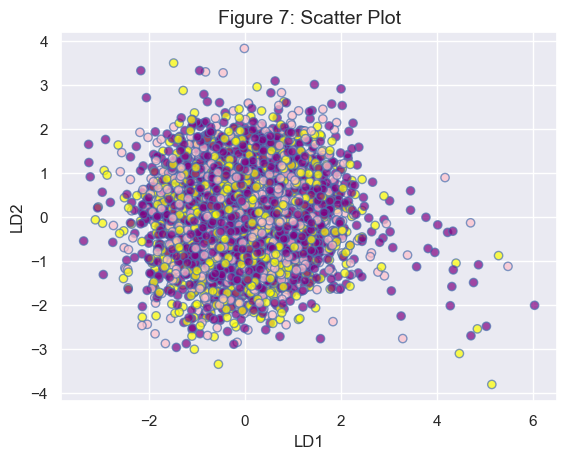

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

colors = ['Purple', 'Purple', 'pink', 'yellow']

custom_cmap = ListedColormap(colors)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(x=X_lda[:, 0],
           y=X_lda[:, 1],
           c=y,
           cmap=custom_cmap, 
           alpha=0.7,
           edgecolors='b')

plt.title('Figure 7: Scatter Plot', fontsize=14)
plt.show()

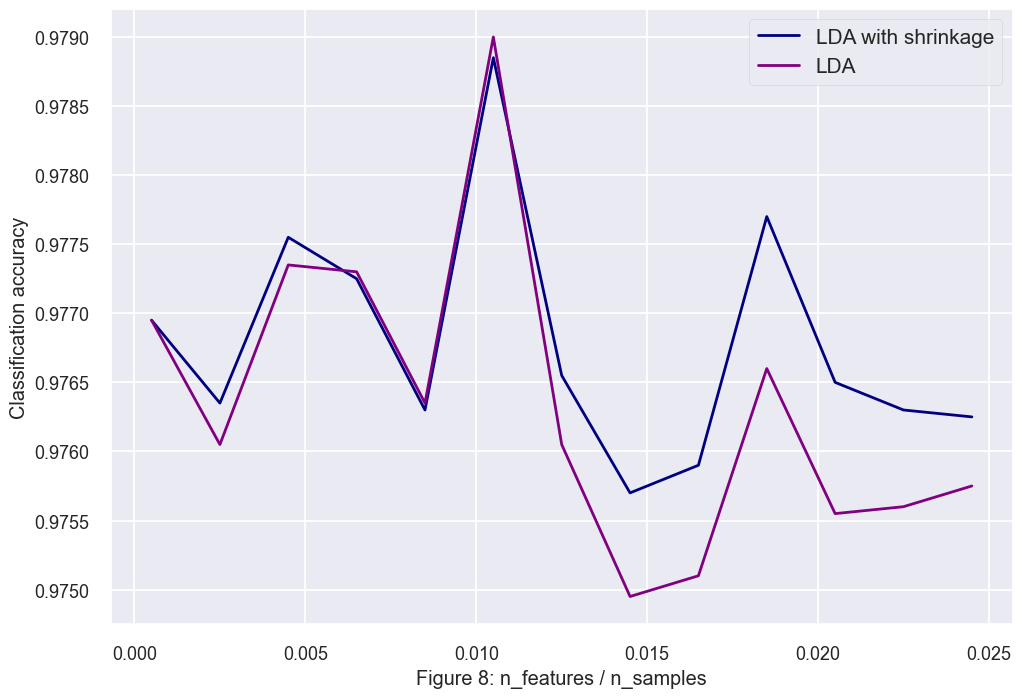

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline

n_train = 2000  
n_test = 400  
n_averages = 50  
n_features_max = 50  
step = 4 


def generate_data(n_samples, n_features):
    X, y = make_blobs(n_samples=n_samples, n_features=4, centers=[[-2], [2]])

    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y

acc_clf1, acc_clf2 = [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_train, n_features)

        clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.5).fit(X, y)
        clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X, y)

        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)

features_samples_ratio = np.array(n_features_range) / n_train

with plt.style.context('seaborn-talk'):
    plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
             label="LDA with shrinkage", color='navy')
    plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
             label="LDA", color='Purple')

    plt.xlabel('Figure 8: n_features / n_samples')
    plt.ylabel('Classification accuracy')
    plt.legend(prop={'size': 15})
    plt.tight_layout()

## Superviser Learning

# PCA:

In [71]:
healthcare_data_no_label=healthcare_data.drop(columns=['Disease_Encoded'])

In [72]:
healthcare_data_no_label.head()

Age        BMI  BloodPressure  Cholesterol  Glucose  Insulin  HeartRate  \
0   56  27.577099           88.0        108.0       92      171         75   
1   69  26.233744           88.0        252.0      102      179         71   
2   46  29.646620          152.0        141.0       89      198         90   
3   32  30.619597          106.0        273.0      159      222         64   
4   60  16.794395           96.0        172.0      173       30         99   

   Smoker  PhysicalActivity  SleepTime  MedicalHistoryScore  IncomeLevel  \
0       0                 1          9                    5            2   
1       0                 2          9                    3            2   
2       1                 0          5                    5            1   
3       1                 1          7                    0            1   
4       1                 0          7                    3            2   

   StressLevel  HealthIns  
0            0          0  
1            1          1  
2            1          0  
3            2          0  
4            1          0

In [73]:
pca = PCA().fit(healthcare_data_no_label)

Text(0, 0.5, 'Cumulative explained variance')

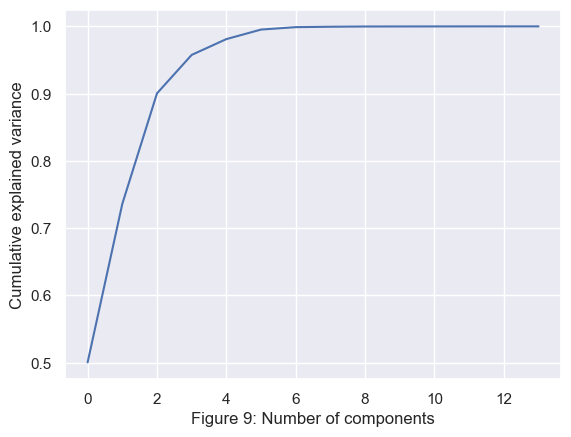

In [74]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Figure 9: Number of components')
plt.ylabel('Cumulative explained variance')

In [75]:
pca = PCA(6)

In [76]:
projected = pca.fit_transform(healthcare_data_no_label)

In [77]:
projected.shape

(5000, 6)

In [78]:
projected

array([[ 25.59576095, -94.00709585, -39.61968714,  41.57060256,
         -7.60895516,  -5.36967906],
       [ 33.26578651,  50.40072535, -37.23179142,  42.15109638,
        -19.95197537,  -9.07011066],
       [ 53.22699134, -61.02717393, -43.34036803, -22.11897676,
          2.60679297,   9.54239748],
       ...,
       [-67.42290317, -14.63478288, -57.03824738, -13.92434539,
          1.29370635, -19.76076155],
       [-27.5624108 , -62.03964721, -59.10288259,  21.25090896,
         14.84218338,  -9.51969635],
       [ 56.02372357,  19.33317278,  -0.686993  ,  48.3239965 ,
        -23.2993867 , -15.96625658]])

In [79]:
healthcare_data_pca = pd.DataFrame(projected, columns=['C1', 'C2', 'C3', 'C4', 'C5', 'C6'])

In [80]:
healthcare_data_pca.head()

C1         C2         C3         C4         C5         C6
0   25.595761 -94.007096 -39.619687  41.570603  -7.608955  -5.369679
1   33.265787  50.400725 -37.231791  42.151096 -19.951975  -9.070111
2   53.226991 -61.027174 -43.340368 -22.118977   2.606793   9.542397
3   74.534389  74.435426  20.222884  24.823298  16.858585 -15.652642
4 -118.121290 -25.928894  32.784371  32.577985 -11.289271  18.294441

In [81]:
healthcare_data_pca['Disease_Encoded']=healthcare_data['Disease_Encoded']

In [82]:
healthcare_data_pca.head()

C1         C2         C3         C4         C5         C6  \
0   25.595761 -94.007096 -39.619687  41.570603  -7.608955  -5.369679   
1   33.265787  50.400725 -37.231791  42.151096 -19.951975  -9.070111   
2   53.226991 -61.027174 -43.340368 -22.118977   2.606793   9.542397   
3   74.534389  74.435426  20.222884  24.823298  16.858585 -15.652642   
4 -118.121290 -25.928894  32.784371  32.577985 -11.289271  18.294441   

   Disease_Encoded  
0                1  
1                0  
2                2  
3                2  
4                1

In [83]:
healthcare_data_array = healthcare_data_pca.values

In [84]:
healthcare_data_array

array([[ 25.59576095, -94.00709585, -39.61968714, ...,  -7.60895516,
         -5.36967906,   1.        ],
       [ 33.26578651,  50.40072535, -37.23179142, ..., -19.95197537,
         -9.07011066,   0.        ],
       [ 53.22699134, -61.02717393, -43.34036803, ...,   2.60679297,
          9.54239748,   2.        ],
       ...,
       [-67.42290317, -14.63478288, -57.03824738, ...,   1.29370635,
        -19.76076155,   2.        ],
       [-27.5624108 , -62.03964721, -59.10288259, ...,  14.84218338,
         -9.51969635,   3.        ],
       [ 56.02372357,  19.33317278,  -0.686993  , ..., -23.2993867 ,
        -15.96625658,   2.        ]])

In [85]:
from sklearn.model_selection import train_test_split
X = healthcare_data_array[:,0:6]
y = healthcare_data_array[:,6]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=42)

In [86]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [87]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [88]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.257500 (0.016696)
LDA: 0.255750 (0.013650)
KNN: 0.245500 (0.022299)
CART: 0.260250 (0.016449)
NB: 0.246250 (0.022199)
SVM: 0.253500 (0.001225)


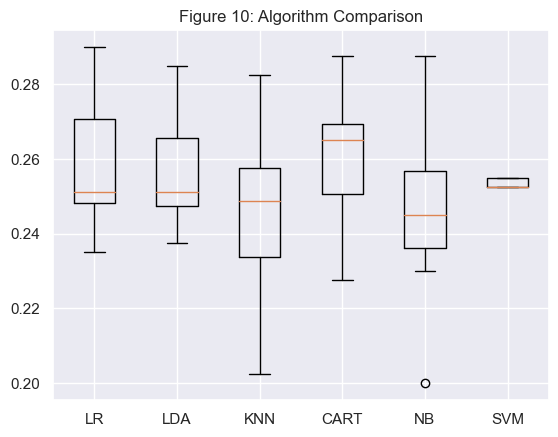

In [89]:
pyplot.boxplot(results, labels=names)
pyplot.title('Figure 10: Algorithm Comparison')
pyplot.show()

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.231
[[71 58 71 28]
 [97 52 78 39]
 [91 44 67 38]
 [89 59 77 41]]


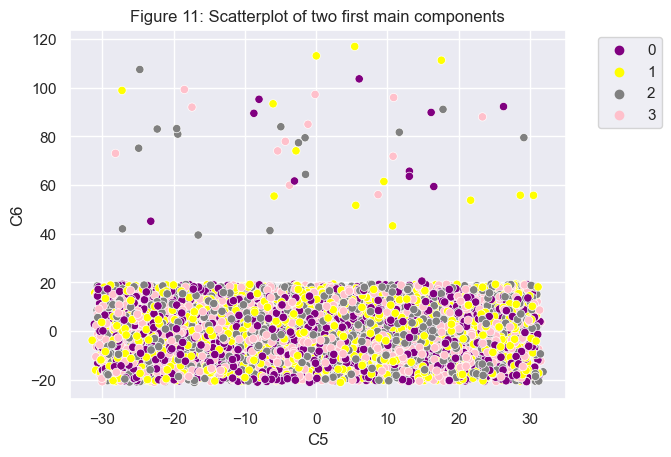

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = ["purple", "yellow", "grey", "pink"]

sns.scatterplot(data=healthcare_data_pca, x='C5', y='C6', hue='Disease_Encoded', palette=custom_palette)

plt.title('Figure 11: Scatterplot of two first main components')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

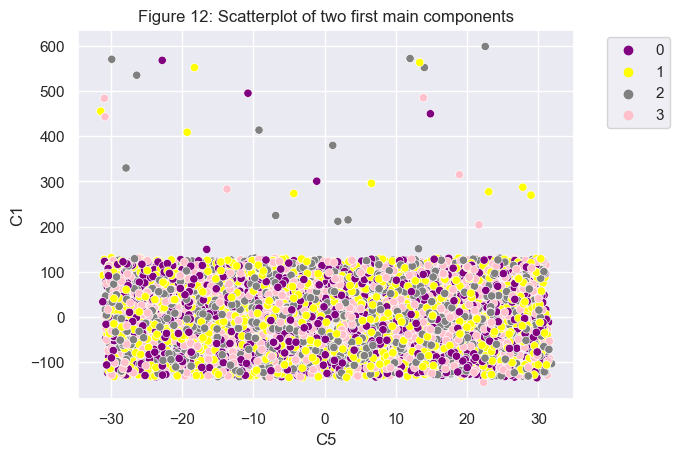

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = ["purple", "yellow", "grey", "pink"]

sns.scatterplot(data=healthcare_data_pca, x='C5', y='C1', hue='Disease_Encoded', palette=custom_palette)

plt.title('Figure 12: Scatterplot of two first main components')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

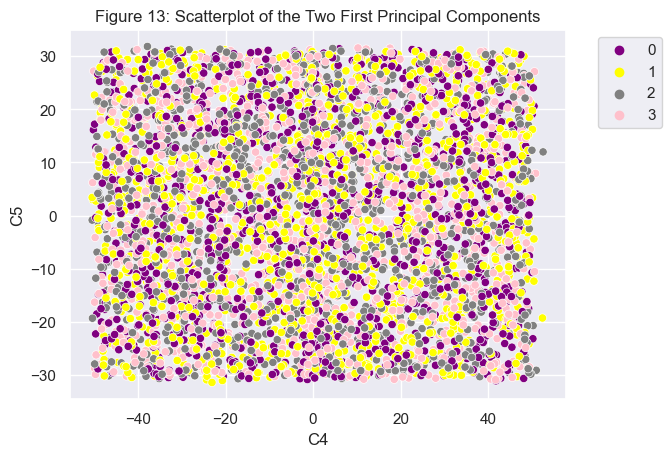

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = ["purple", "yellow", "grey", "pink"]

sns.scatterplot(data=healthcare_data_pca, x='C4', y='C5', hue='Disease_Encoded', palette=custom_palette)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Figure 13: Scatterplot of the Two First Principal Components')
plt.show()

UNSUPERVISED LEARNING ALGORITHMS: Are used with NO LABELS/TARGET, and the goal is to find relationship in the data.

O aprendizado não supervisionado, não há rótulos nos dados de treinamento. O algoritmo é deixado para encontrar padrões ou estrutura nos dados por conta própria. Alguns exemplos de técnicas de aprendizado não supervisionado incluem clustering e dimensionality reduction.

* Clustering, em aprendizado de máquina, refere-se a uma técnica de agrupamento de dados semelhantes em grupos chamados clusters. O objetivo é encontrar estrutura nos dados para que itens dentro do mesmo cluster sejam mais semelhantes entre si do que com itens em outros clusters.

Existem vários algoritmos de clustering, como o K-Means, o DBSCAN e o Hierarchical Clustering. Esses algoritmos podem ser úteis em várias aplicações, como segmentação de mercado, análise de redes sociais, detecção de anomalias e muito mais. O clustering é uma ferramenta poderosa para explorar e entender conjuntos de dados complexos.

Agrupamento de Clientes: Neste exemplo, o objetivo é agrupar clientes com base em seu comportamento de compra. O conjunto de dados consiste em transações de clientes, mas não inclui rótulos de segmentação de clientes. O algoritmo de aprendizado não supervisionado, como o algoritmo K-means, é usado para agrupar clientes com base em padrões de compra semelhantes, sem a necessidade de rótulos pré-existentes.

Redução de Dimensionalidade de Dados: Neste exemplo, o objetivo é reduzir a dimensionalidade de um conjunto de dados de alta dimensão para visualização ou análise mais eficiente. O conjunto de dados pode consistir em muitas variáveis, mas não há rótulos de classe associados. Algoritmos de aprendizado não supervisionado, como Análise de Componentes Principais-(Principal Component Analysis) (PCA), são usados para projetar os dados em um espaço de menor dimensão, preservando ao máximo a variação nos dados.



### K-means Clustering:
### Detecção de anomalias: Embora o k-Means seja mais comumente usado para agrupamento, ele também pode ser adaptado para detecção de anomalias, onde pontos que não se enquadram em nenhum cluster podem ser considerados anomalias.

In [94]:
from sklearn.cluster import KMeans

In [95]:
X = healthcare_data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].values
y = healthcare_data.iloc[:, 14].values

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
columns_to_cluster = [
                 'Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Glucose', 'Insulin', 
                 'HeartRate', 'Smoker', 'PhysicalActivity', 'SleepTime', 'MedicalHistoryScore',
                 'IncomeLevel', 'StressLevel', 'HealthIns'
]
subset = healthcare_data[columns_to_cluster]

In [98]:
scaler = StandardScaler()

subset_scaled = scaler.fit_transform(subset)

kmeans = KMeans(n_clusters=5, max_iter=50, random_state=42)
kmeans.fit(subset_scaled)

labels = kmeans.labels_

In [99]:
healthcare_data['Cluster'] = kmeans.labels_
print(healthcare_data.head())

   Age        BMI  BloodPressure  Cholesterol  Glucose  Insulin  HeartRate  \
0   56  27.577099           88.0        108.0       92      171         75   
1   69  26.233744           88.0        252.0      102      179         71   
2   46  29.646620          152.0        141.0       89      198         90   
3   32  30.619597          106.0        273.0      159      222         64   
4   60  16.794395           96.0        172.0      173       30         99   

   Smoker  PhysicalActivity  SleepTime  MedicalHistoryScore  IncomeLevel  \
0       0                 1          9                    5            2   
1       0                 2          9                    3            2   
2       1                 0          5                    5            1   
3       1                 1          7                    0            1   
4       1                 0          7                    3            2   

   StressLevel  HealthIns  Disease_Encoded  Cluster  
0            0      

In [100]:
cluster_summary = healthcare_data.groupby('Cluster').mean()
print(cluster_summary)

               Age        BMI  BloodPressure  Cholesterol     Glucose  \
Cluster                                                                 
0        49.324978  27.448230     129.835960   201.086865  133.241141   
1        48.385185  27.097669     128.724027   197.941383  134.710288   
2        46.623529  27.063395     128.191098   203.744448  284.811765   
3        48.180695  27.357809     129.889907   199.336939  137.555985   
4        49.530449  27.447392     130.626356   199.871708  133.834936   

            Insulin   HeartRate    Smoker  PhysicalActivity  SleepTime  \
Cluster                                                                  
0        145.404494   80.597234  0.000000          0.990493   7.494382   
1        149.832922   78.980247  1.000000          0.986008   7.505350   
2        119.882353  122.000000  0.494118          0.988235   7.811765   
3        148.477992   79.494981  1.000000          1.006178   7.406178   
4        144.324519   79.472756  0.000000   

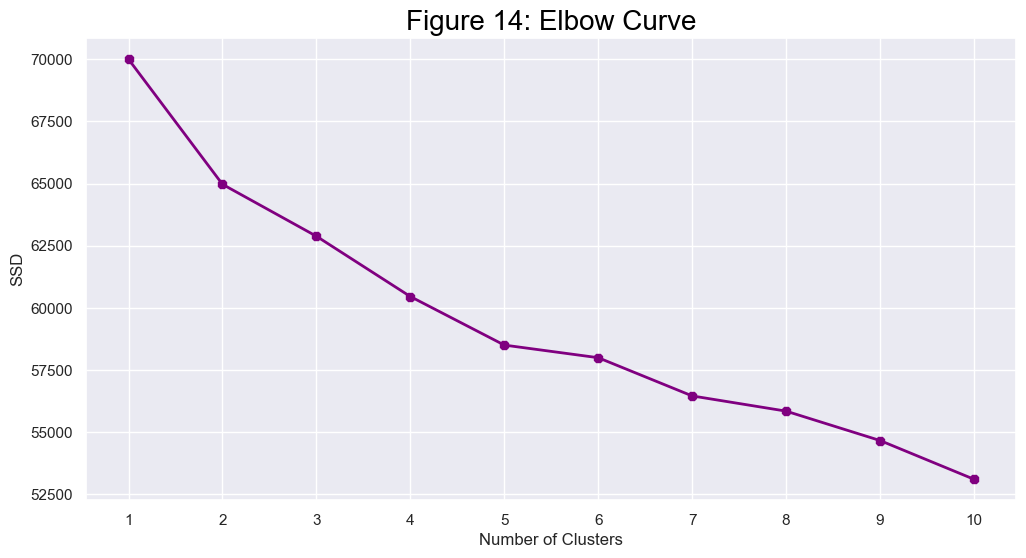

In [101]:
ssd = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)
    kmeans.fit(subset_scaled)
    ssd.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), ssd, linewidth=2, color="purple", marker="8")
plt.xlabel("Number of Clusters")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("SSD")
plt.title("Figure 14: Elbow Curve", fontsize=20, color="black")

plt.grid(True)

plt.show()

In [102]:
healthcare_data['Cluster'] = labels

print(healthcare_data.head())

print("Inertia:", kmeans.inertia_)

print("Cluster Centers:", kmeans.cluster_centers_)

   Age        BMI  BloodPressure  Cholesterol  Glucose  Insulin  HeartRate  \
0   56  27.577099           88.0        108.0       92      171         75   
1   69  26.233744           88.0        252.0      102      179         71   
2   46  29.646620          152.0        141.0       89      198         90   
3   32  30.619597          106.0        273.0      159      222         64   
4   60  16.794395           96.0        172.0      173       30         99   

   Smoker  PhysicalActivity  SleepTime  MedicalHistoryScore  IncomeLevel  \
0       0                 1          9                    5            2   
1       0                 2          9                    3            2   
2       1                 0          5                    5            1   
3       1                 1          7                    0            1   
4       1                 0          7                    3            2   

   StressLevel  HealthIns  Disease_Encoded  Cluster  
0            0      

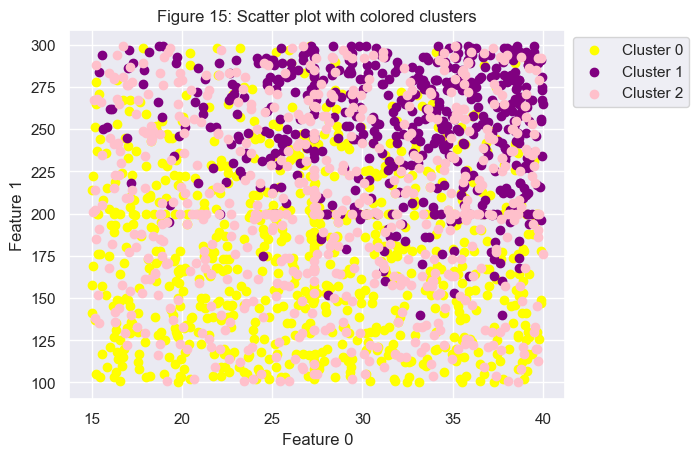

In [103]:
import matplotlib.pyplot as plt

X_varied = healthcare_data[['BMI', 'Cholesterol']].values

y_pred = kmeans.labels_

colors = ['yellow', 'purple', 'pink']

for cluster_id, color in zip(range(3), colors):
    plt.scatter(X_varied[y_pred == cluster_id, 0], X_varied[y_pred == cluster_id, 1], color=color)

plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Figure 15: Scatter plot with colored clusters")
plt.show()

In [104]:
import plotly.express as px
import pandas as pd

healthcare_data['Cluster'] = kmeans.labels_

scatter_data = pd.DataFrame({
    'Age': healthcare_data['Age'],
    'BloodPressure': healthcare_data['BloodPressure'],
    'HeartRate': healthcare_data['HeartRate'],
    'Smoker': healthcare_data['Smoker'],
    'PhysicalActivity': healthcare_data['PhysicalActivity'],
    'SleepTime': healthcare_data['SleepTime'],
    'MedicalHistoryScore': healthcare_data['MedicalHistoryScore'],
    'StressLevel': healthcare_data['StressLevel'],
    'HealthIns': healthcare_data['HealthIns'],
    'Disease_Encoded': healthcare_data['Disease_Encoded'],
    'Cluster': healthcare_data['Cluster']
})

fig = px.scatter_3d(scatter_data, 
                    x='Age', 
                    y='BloodPressure', 
                    z='HeartRate', 
                    color='Cluster', 
                    color_continuous_scale='purples',  
                    title='Figure 16: 3D Cluster Scatter Plot')

fig.update_traces(marker=dict(size=5))

fig.update_layout(height=600, width=800)

fig.show()

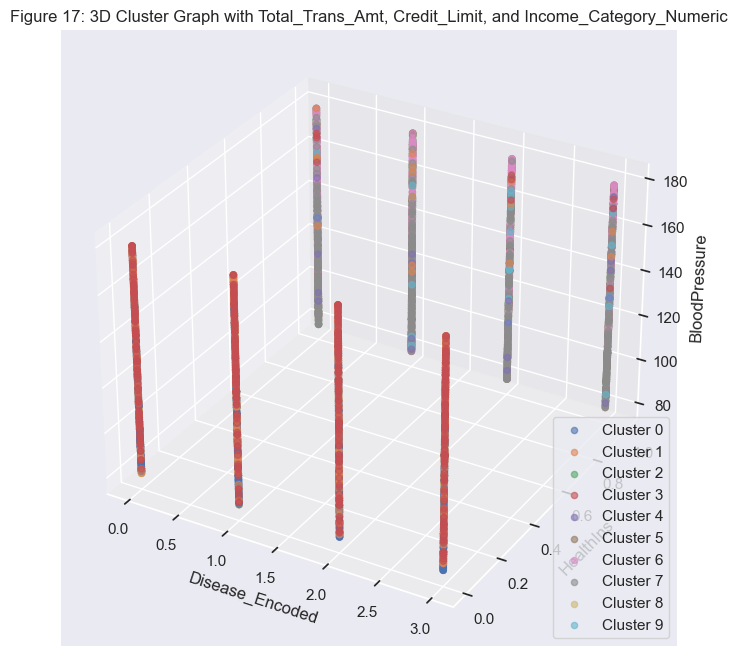

In [105]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = healthcare_data['Disease_Encoded']
y = healthcare_data['HealthIns']
z = healthcare_data['BloodPressure']

labels = kmeans.labels_

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in set(labels):
    indices = labels == label
    ax.scatter(x[indices], y[indices], z[indices], label=f'Cluster {label}', alpha=0.6)

ax.set_xlabel('Disease_Encoded')
ax.set_ylabel('HealthIns')
ax.set_zlabel('BloodPressure')

plt.legend()
plt.title('Figure 17: 3D Cluster Graph with Total_Trans_Amt, Credit_Limit, and Income_Category_Numeric')
plt.show()

## Classification:

A vantagem de ter o modelo treinado em um objeto como nvclassifier é que você pode usá-lo facilmente para fazer previsões em novos conjuntos de dados sem ter que refazer o treinamento. Isso economiza tempo e recursos computacionais, especialmente se você precisar fazer várias previsões ou se quiser experimentar diferentes conjuntos de dados de teste.

#### Splitting into set 10%

In [106]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 102)

In [107]:
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Total number of rows and columns for the complete dataset:  (5000, 14) (5000,)
Number of rows and columns after splitting dataset:  (4500, 14) (500, 14) (4500,) (500,)


In [108]:
from sklearn.naive_bayes import GaussianNB

nvclassifier = GaussianNB()

nvclassifier.fit(X_train, y_train)

GaussianNB()

In [109]:
y_pred = nvclassifier.predict(X_test)

print(y_pred)

[1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0
 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1
 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1
 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0
 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1
 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1
 1 1 0 0 1 1 1 1 1 1 1 0 

In [110]:
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:,:]

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1,

In [111]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

1.0


### Confusion Matrix

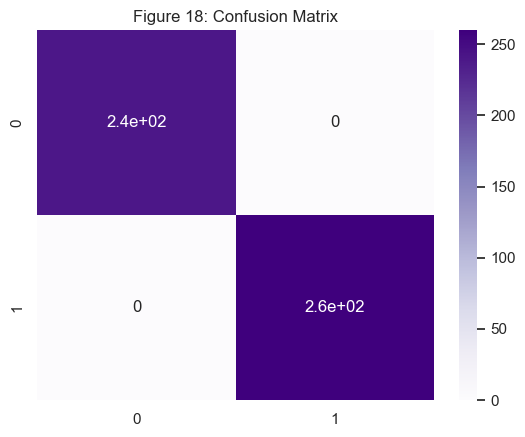

[[240   0]
 [  0 260]] (2, 2)


In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

custom_palette = sns.color_palette("Purples", as_cmap=True)

ax = sns.heatmap(cm, annot=True, cmap=custom_palette)

ax.set_title('Figure 18: Confusion Matrix')

plt.show()

print(cm, cm.shape)

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       260

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [114]:
from sklearn.model_selection import cross_val_score

nvclassifier = GaussianNB()

cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 40).mean()

1.0

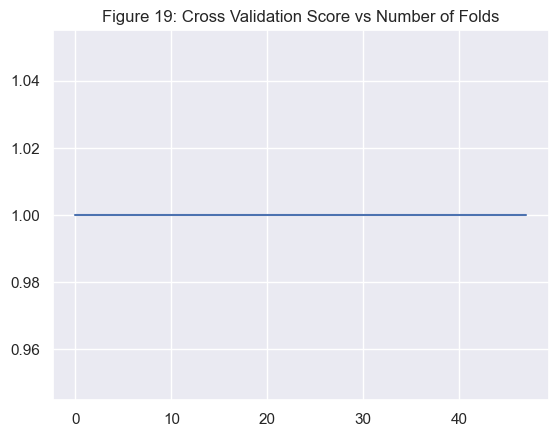

In [115]:
list = []
for i in range(2,50):
    list.append(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = i).mean())

plt.title('Figure 19: Cross Validation Score vs Number of Folds')
plt.plot(list)

#### Splitting into set 20%

In [116]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 102)

In [117]:
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Total number of rows and columns for the complete dataset:  (5000, 14) (5000,)
Number of rows and columns after splitting dataset:  (4000, 14) (1000, 14) (4000,) (1000,)


In [118]:
from sklearn.naive_bayes import GaussianNB

nvclassifier = GaussianNB()

nvclassifier.fit(X_train, y_train)

GaussianNB()

In [119]:
y_pred = nvclassifier.predict(X_test)

print(y_pred)

[1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0
 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1
 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1
 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0
 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1
 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1
 1 1 0 0 1 1 1 1 1 1 1 0 

In [120]:
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:,:]

array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [1, 1],
       [0, 0],
       [0, 0]], dtype=int64)

In [121]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

1.0


### Confusion Matrix

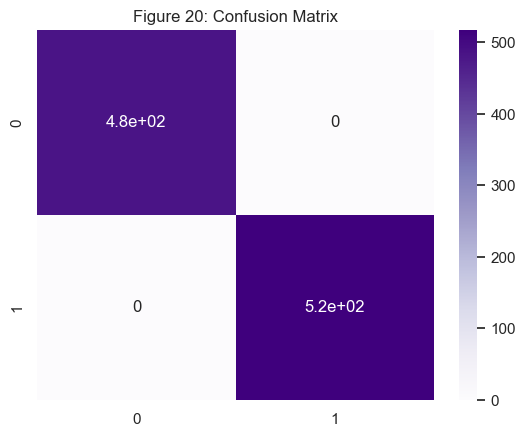

[[483   0]
 [  0 517]] (2, 2)


In [122]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

custom_palette = sns.color_palette("Purples", as_cmap=True)

heatmap = sns.heatmap(cm, annot=True, cmap=custom_palette)

heatmap.set_title('Figure 20: Confusion Matrix')

plt.show()

print(cm, cm.shape)

In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       1.00      1.00      1.00       517

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [124]:
from sklearn.model_selection import cross_val_score

nvclassifier = GaussianNB()

cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 40).mean()

1.0

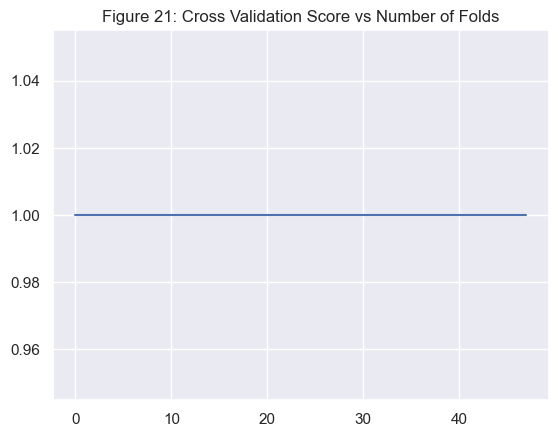

In [125]:
list = []
for i in range(2,50):
    list.append(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = i).mean())

plt.title('Figure 21: Cross Validation Score vs Number of Folds')
plt.plot(list)

#### Splitting into set 30%

In [126]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 102)

In [127]:
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Total number of rows and columns for the complete dataset:  (5000, 14) (5000,)
Number of rows and columns after splitting dataset:  (3500, 14) (1500, 14) (3500,) (1500,)


In [128]:
from sklearn.naive_bayes import GaussianNB

nvclassifier = GaussianNB()

nvclassifier.fit(X_train, y_train)

GaussianNB()

In [129]:
y_pred = nvclassifier.predict(X_test)

print(y_pred)

[1 1 1 ... 1 0 0]


In [130]:
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:,:]

array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [1, 1],
       [0, 0],
       [0, 0]], dtype=int64)

In [131]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

1.0


### Confusion Matrix

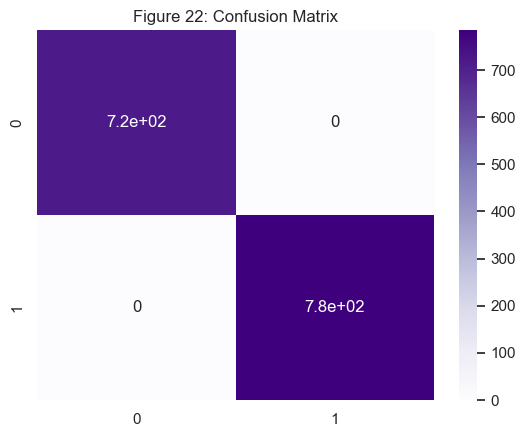

[[715   0]
 [  0 785]] (2, 2)


In [132]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

custom_palette = sns.color_palette("Purples", as_cmap=True)

sns.heatmap(cm, annot=True, cmap=custom_palette)
plt.title('Figure 22: Confusion Matrix')

plt.show()

print(cm, cm.shape)

In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       715
           1       1.00      1.00      1.00       785

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [134]:
from sklearn.model_selection import cross_val_score

nvclassifier = GaussianNB()

cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 40).mean()

1.0

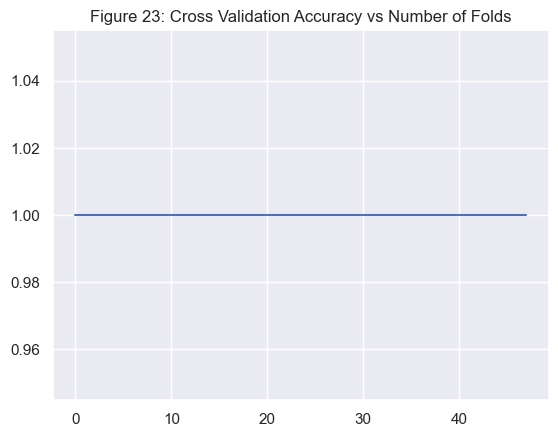

In [135]:
list = []
for i in range(2,50):
    list.append(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = i).mean())

plt.title('Figure 23: Cross Validation Accuracy vs Number of Folds')
plt.plot(list)

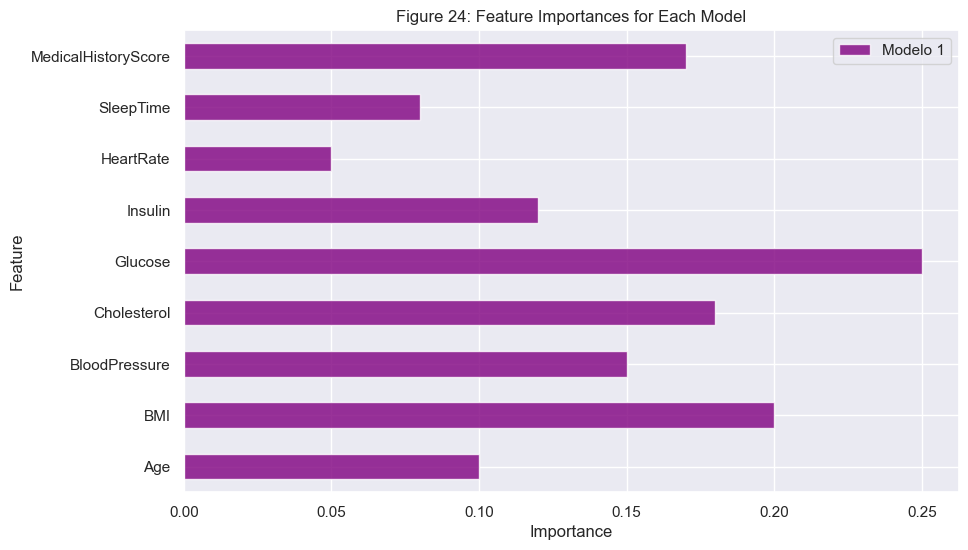

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

models_importances = {"Modelo 1": [0.1, 0.2, 0.15, 0.18, 0.25, 0.12, 0.05, 0.08, 0.17]}

index = ['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Glucose', 'Insulin', 'HeartRate', 'SleepTime', 'MedicalHistoryScore']

plt.figure(figsize=(10, 6))
for model, importances in models_importances.items():
    feature_importances = pd.Series(importances, index=index)
    feature_importances.plot(kind='barh', label=model, alpha=0.8, color='purple')  

plt.title('Figure 24: Feature Importances for Each Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend()
plt.grid(True)
plt.show()

### Logistic Regression

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

In [138]:
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

print(clf)

LogisticRegression(C=1, solver='newton-cg')


In [139]:
LOG = clf.fit(X_train,y_train)
prediction = LOG.predict(X_test)

In [140]:
from sklearn import metrics

print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       1.00      1.00      1.00       261

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



### Confusion Matrix

In [141]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[239   0]
 [  0 261]]


In [142]:
LOG.classes_

array([0, 1], dtype=int64)

In [143]:
mapping = {0:'Disease_A', 1:'Disease_B', 2:'Disease_C', 3:'Disease_Unknown'}
classesMapped = [mapping.get(value, value) for value in clf.classes_]
classesMapped

['Disease_A', 'Disease_B']

Accuracy for Logistic Regression: 1.0
Confusion Matrix for Logistic Regression:
[[239   0]
 [  0 261]]


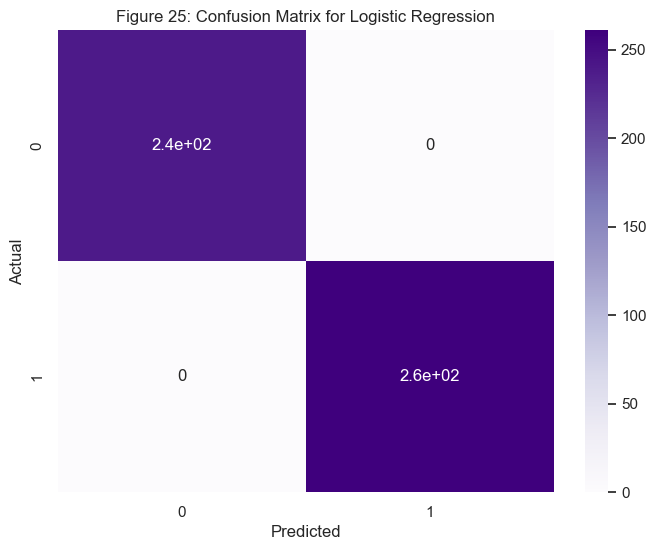

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Logistic Regression: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix for Logistic Regression:\n{cm}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples')
plt.title("Figure 25: Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

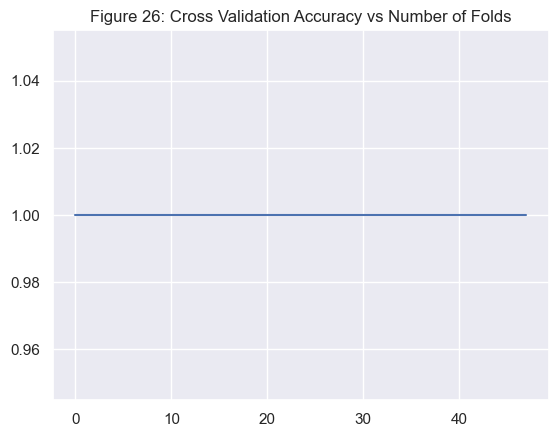

In [145]:
list = []
for i in range(2,50):
    list.append(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = i).mean())
plt.title('Figure 26: Cross Validation Accuracy vs Number of Folds')
plt.plot(list)

In [146]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 1.0


In [147]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Final Average Accuracy of the model: 1.0


#### Splitting into set 20%

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [149]:
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

print(clf)

LogisticRegression(C=1, solver='newton-cg')


In [150]:
LOG = clf.fit(X_train,y_train)
prediction = LOG.predict(X_test)

In [151]:
from sklearn import metrics

print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       477
           1       1.00      1.00      1.00       523

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



### Confusion Matrix

In [152]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[477   0]
 [  0 523]]


In [153]:
LOG.classes_

array([0, 1], dtype=int64)

In [154]:
mapping = {0:'Disease_A', 1:'Disease_B', 2:'Disease_C', 3:'Disease_Unknown'}
classesMapped = [mapping.get(value, value) for value in clf.classes_]
classesMapped

['Disease_A', 'Disease_B']

Accuracy for Logistic Regression: 1.0
Confusion Matrix for Logistic Regression:
[[477   0]
 [  0 523]]


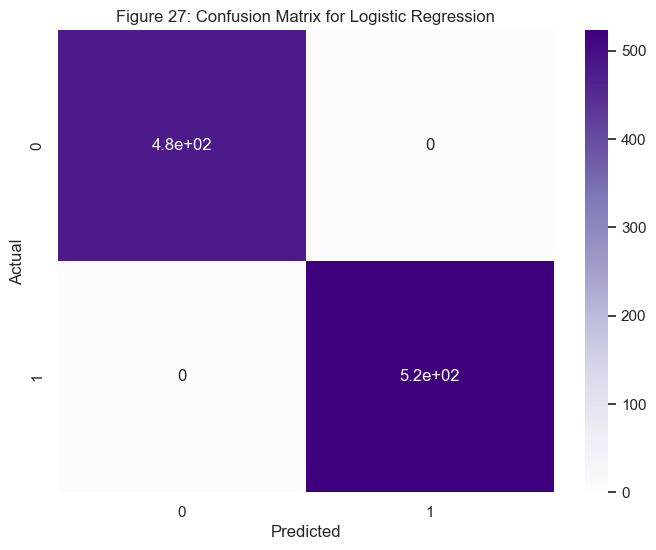

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Logistic Regression: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix for Logistic Regression:\n{cm}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples')
plt.title("Figure 27: Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

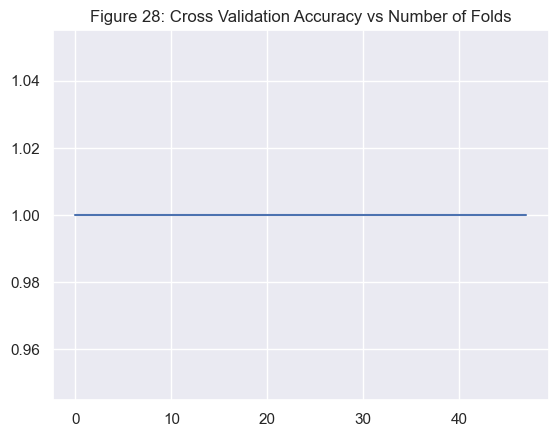

In [156]:
list = []
for i in range(2,50):
    list.append(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = i).mean())

plt.title('Figure 28: Cross Validation Accuracy vs Number of Folds')
plt.plot(list)

In [157]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 1.0


In [158]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Final Average Accuracy of the model: 1.0


#### Splitting into set 30%

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [160]:
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

print(clf)

LogisticRegression(C=1, solver='newton-cg')


In [161]:
LOG = clf.fit(X_train,y_train)
prediction = LOG.predict(X_test)

In [162]:
from sklearn import metrics

print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       720
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



### Confusion Matrix

In [163]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[720   0]
 [  0 780]]


In [164]:
LOG.classes_

array([0, 1], dtype=int64)

In [165]:
mapping = {0:'Disease_A', 1:'Disease_B', 2:'Disease_C', 3:'Disease_Unknown'}
classesMapped = [mapping.get(value, value) for value in clf.classes_]
classesMapped

['Disease_A', 'Disease_B']

Accuracy for Logistic Regression: 1.0
Confusion Matrix for Logistic Regression:
[[720   0]
 [  0 780]]


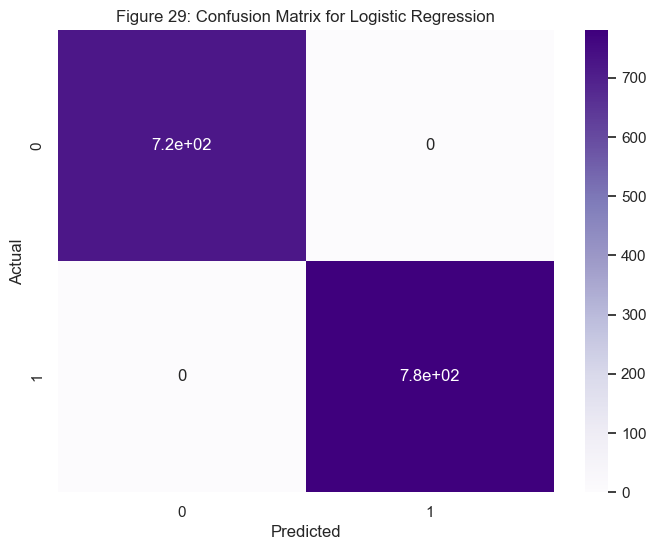

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Logistic Regression: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix for Logistic Regression:\n{cm}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples')
plt.title("Figure 29: Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

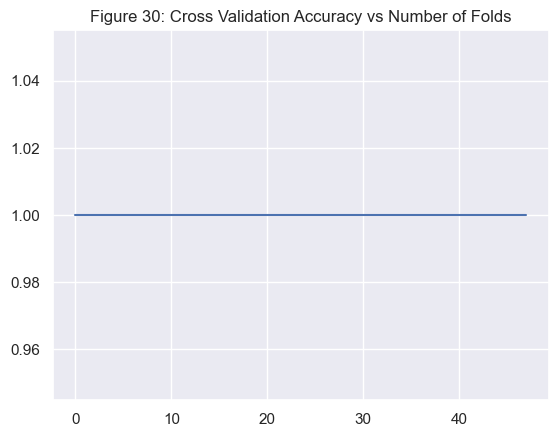

In [167]:
list = []
for i in range(2,50):
    list.append(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = i).mean())

plt.title('Figure 30: Cross Validation Accuracy vs Number of Folds')
plt.plot(list)

In [168]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 1.0


In [169]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Final Average Accuracy of the model: 1.0


### Random Forest

#### Splitting into set 10%

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

In [171]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5000, 14), (5000,), (4500, 14), (500, 14), (4500,), (500,))

In [172]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(n_estimators = 1000)

clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [173]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 1.0
Accuracy: 1.00


In [174]:
X = healthcare_data.drop('Disease_Encoded',axis=1)

y = healthcare_data['Disease_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Confusion Matrix

Accuracy for Logistic Regression: 0.26
Confusion Matrix for Logistic Regression:
[[ 87 104  61 130]
 [ 80 105  60 120]
 [ 87 109  72 115]
 [ 76  99  69 126]]


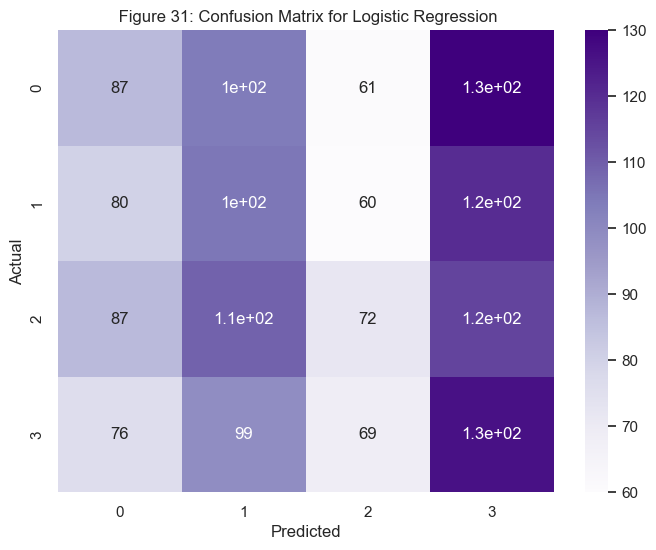

Accuracy for Random Forest: 0.25933333333333336
Confusion Matrix for Random Forest:
[[102  89  98  93]
 [ 88 100  76 101]
 [ 88 115  88  92]
 [ 89  99  83  99]]


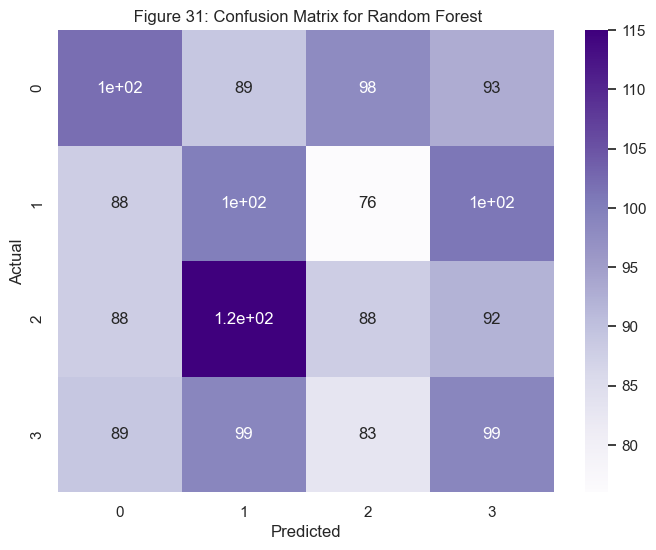

Accuracy for Support Vector Machine: 0.254
Confusion Matrix for Support Vector Machine:
[[  9 183  84 106]
 [  6 177  95  87]
 [  4 191  89  99]
 [  5 180  79 106]]


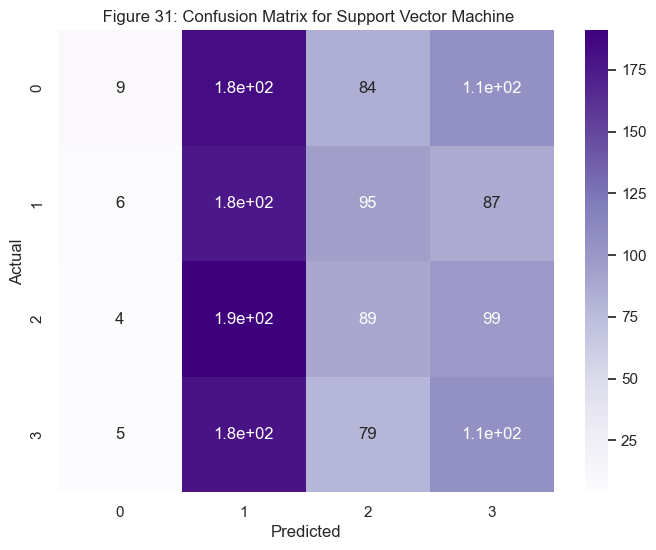

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

for name, model in models.items():
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy}")
    
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n{cm}")
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Purples')
    plt.title(f" Figure 31: Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

#### Default Hyperparameters

In [176]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [177]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [178]:
predictions = rfc.predict(X_test)

In [179]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [180]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25       382
           1       0.25      0.30      0.27       365
           2       0.26      0.21      0.23       383
           3       0.29      0.30      0.29       370

    accuracy                           0.26      1500
   macro avg       0.26      0.26      0.26      1500
weighted avg       0.26      0.26      0.26      1500



### Confusion Matrix

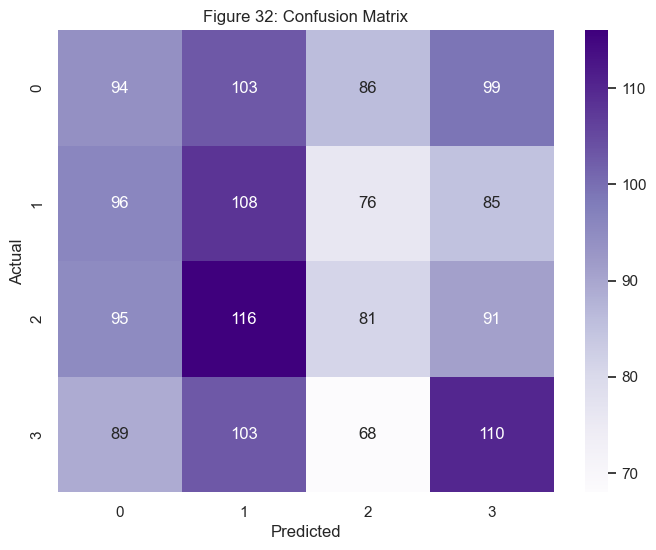

In [181]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)

custom_palette = sns.color_palette("Purples", as_cmap=True)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap=custom_palette, fmt='g')
plt.title('Figure 32: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [182]:
print(accuracy_score(y_test,predictions))

0.262


### Hyperparameter Tuning

#### Tuning max_depth

In [183]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'max_depth': range(2, 20, 5)}   

rf = RandomForestClassifier()


rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, scoring='accuracy')

In [184]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.190599      0.003354         0.011652        0.000646   
1       0.352745      0.012476         0.015701        0.001220   
2       0.568622      0.030525         0.020240        0.001988   
3       0.695016      0.037016         0.021679        0.001230   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.244286           0.262857   
1               7   {'max_depth': 7}           0.257143           0.267143   
2              12  {'max_depth': 12}           0.248571           0.252857   
3              17  {'max_depth': 17}           0.254286           0.267143   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.250000           0.272857           0.257143         0.257429   
1           0.245714           0.268571           0.257143         0.259143   
2           0.245714           0.272857           0.227143         0.249429   
3           0.245714           0.244286           0.230000         0.248286   

   std_test_score  rank_test_score  
0        0.009955                2  
1        0.008261                1  
2        0.014641                3  
3        0.012236                4

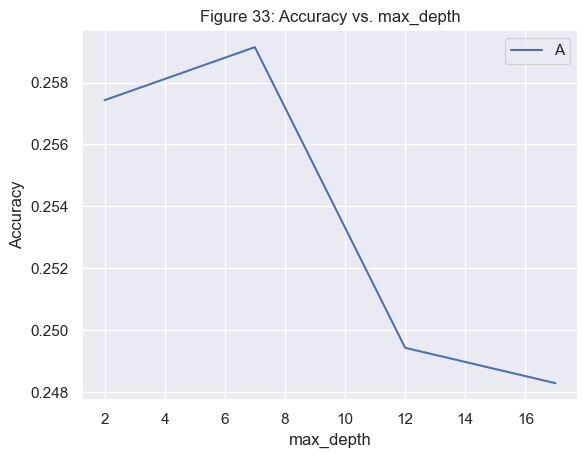

In [185]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend('Accuracy')

plt.title("Figure 33: Accuracy vs. max_depth")

plt.show()

#### Grid Search to Find Optimal Hyperparameters

In [186]:
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),   # based on the records, on this case it has 3000
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]     #number of columns
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [187]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [188]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.2614276342510324 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [189]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [190]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)

In [191]:
predictions = rfc.predict(X_test)

In [192]:
from sklearn.metrics import classification_report,confusion_matrix

In [193]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.25      0.16      0.20       382
           1       0.23      0.31      0.26       365
           2       0.26      0.18      0.21       383
           3       0.29      0.38      0.33       370

    accuracy                           0.26      1500
   macro avg       0.25      0.26      0.25      1500
weighted avg       0.25      0.26      0.25      1500



### Confusion Matrix

In [194]:
print(confusion_matrix(y_test,predictions))

[[ 62 132  71 117]
 [ 72 112  69 112]
 [ 65 126  68 124]
 [ 54 118  56 142]]


#### Splitting into set 20%

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [196]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5000, 15), (5000,), (4000, 15), (1000, 15), (4000,), (1000,))

In [197]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(n_estimators = 1000)

clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [198]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.264
Accuracy: 0.26


#### Splitting into set 30%

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [200]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5000, 15), (5000,), (3500, 15), (1500, 15), (3500,), (1500,))

In [201]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(n_estimators = 1000)

clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [202]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.24733333333333332
Accuracy: 0.25


### Min Max Scaler

In [203]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN

In [204]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors = 4)

kNN.fit(X_train, y_train)

y_pred = kNN.predict(X_test)

In [205]:
from sklearn import metrics

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.23


### Confusion Matrix

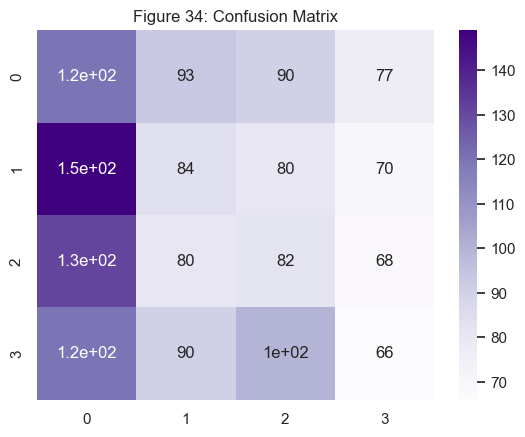

In [206]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_predict = kNN.predict(X_test)

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, cmap='Purples')

plt.title('Figure 34: Confusion Matrix')

plt.show()

In [207]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.23      0.32      0.27       380
           1       0.24      0.22      0.23       383
           2       0.23      0.23      0.23       361
           3       0.23      0.18      0.20       376

    accuracy                           0.23      1500
   macro avg       0.24      0.23      0.23      1500
weighted avg       0.24      0.23      0.23      1500



# Decision Tree

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [209]:
healthcare_data.columns

Index(['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Glucose', 'Insulin',
       'HeartRate', 'Smoker', 'PhysicalActivity', 'SleepTime',
       'MedicalHistoryScore', 'IncomeLevel', 'StressLevel', 'HealthIns',
       'Disease_Encoded', 'Cluster'],
      dtype='object')

In [210]:
feature_cols = ['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Smoker', 'Glucose', 'Insulin',
       'HeartRate', 'PhysicalActivity', 'SleepTime',
       'MedicalHistoryScore', 'IncomeLevel', 'StressLevel', 'HealthIns']
X = healthcare_data[feature_cols]
y = healthcare_data.Disease_Encoded

In [211]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(criterion='gini', max_depth = 4, random_state = 0)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [212]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.24
Accuracy: 0.24


In [213]:
X.columns.tolist()

['Age',
 'BMI',
 'BloodPressure',
 'Cholesterol',
 'Smoker',
 'Glucose',
 'Insulin',
 'HeartRate',
 'PhysicalActivity',
 'SleepTime',
 'MedicalHistoryScore',
 'IncomeLevel',
 'StressLevel',
 'HealthIns']

In [214]:
healthcare_data['Disease_Encoded'].unique().tolist()

[1, 0, 2, 3]

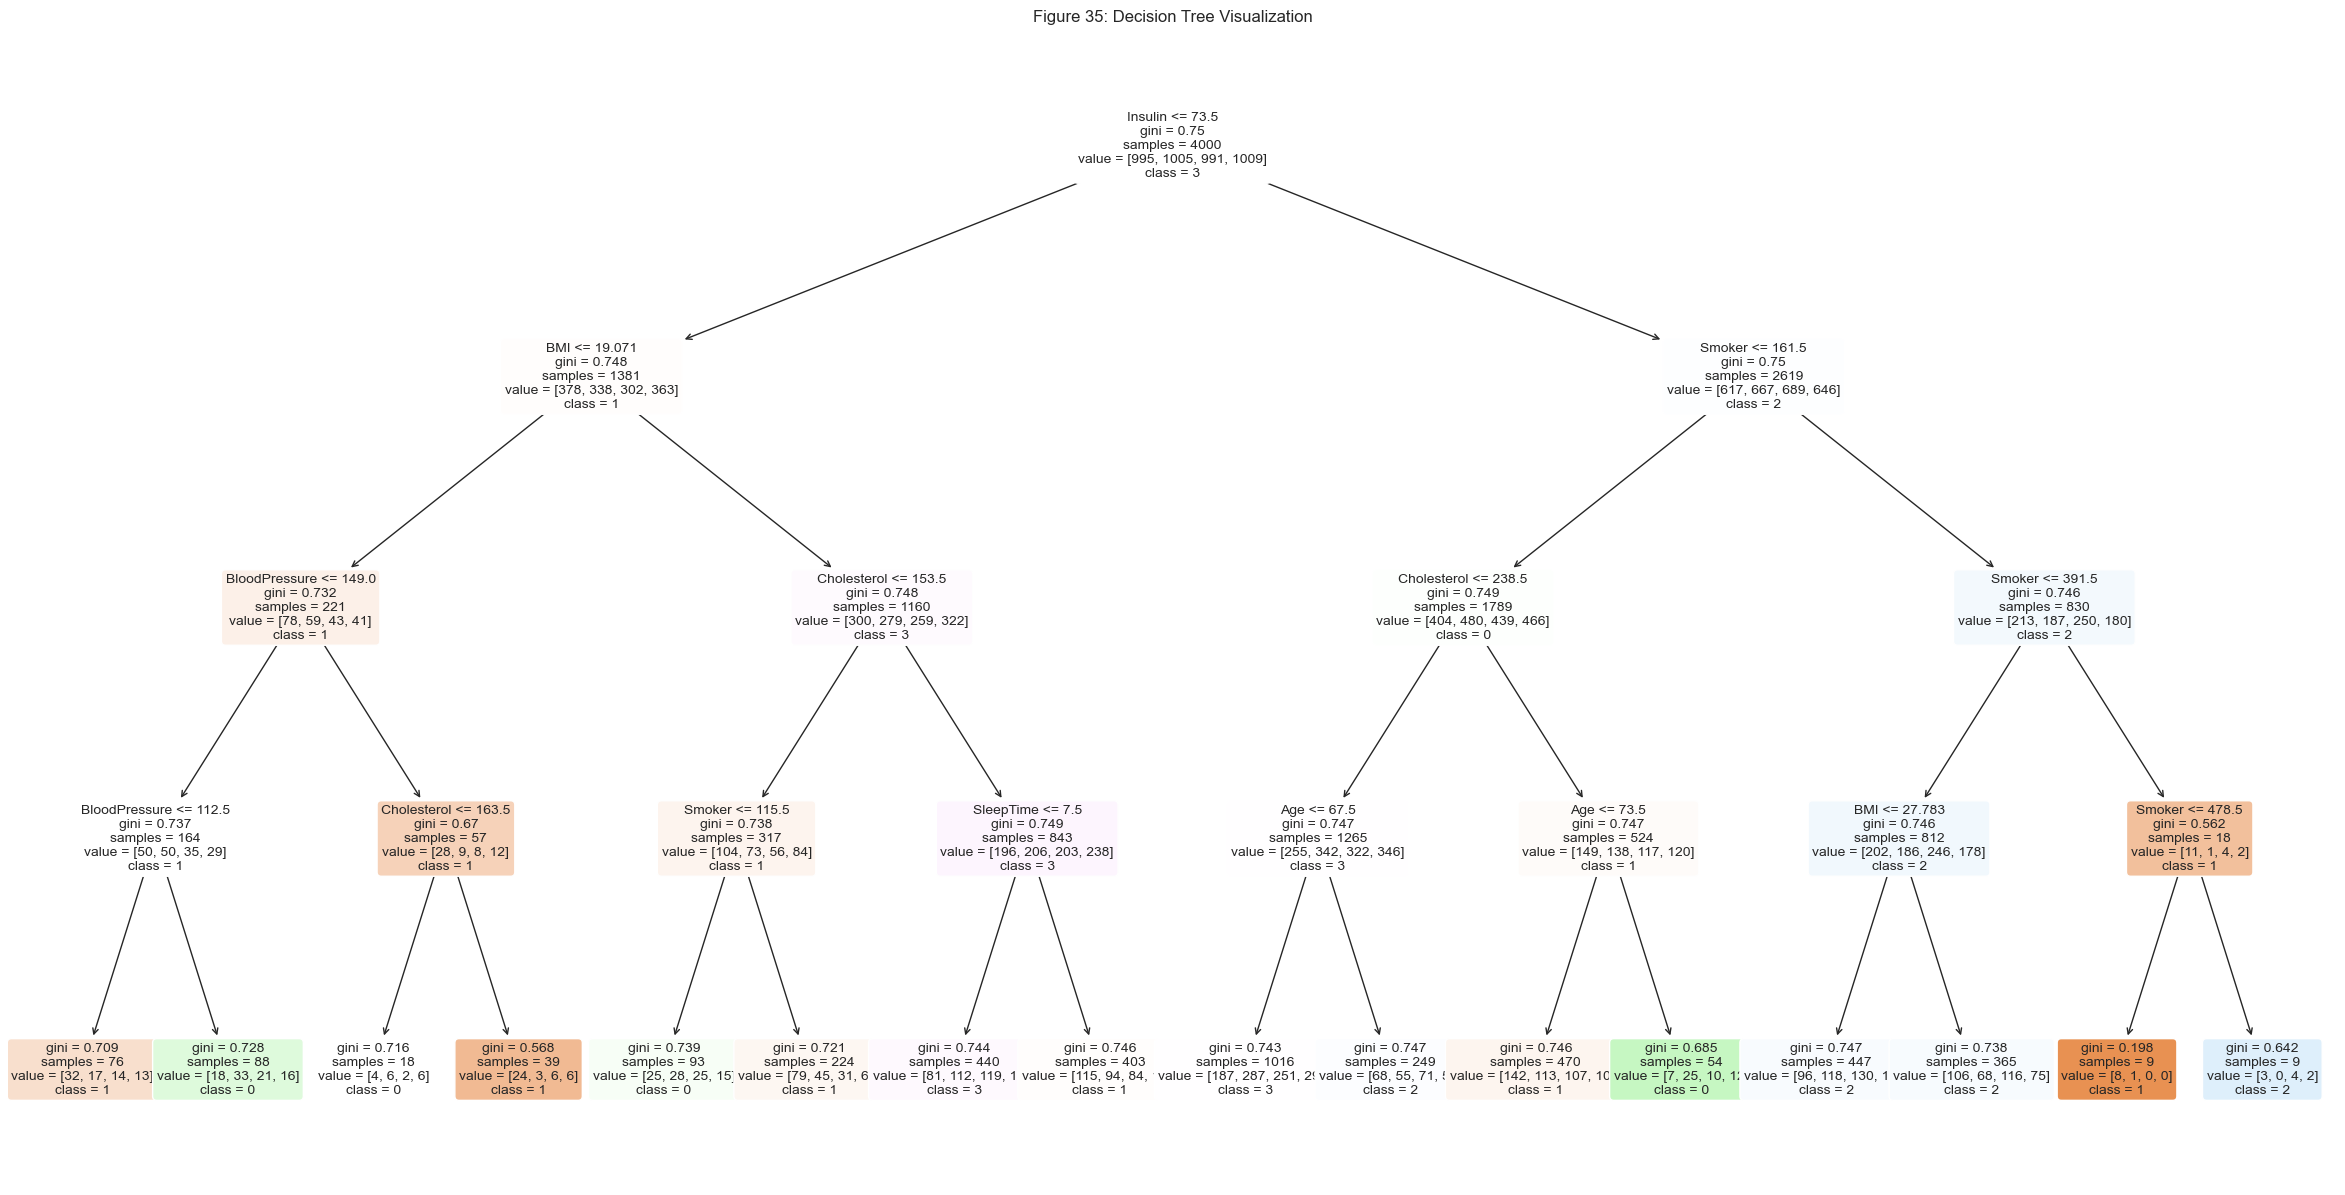

In [215]:
plt.figure(figsize=(30, 15))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=[str(label) for label in healthcare_data['Disease_Encoded'].unique()], rounded=True, fontsize=10)
plt.title('Figure 35: Decision Tree Visualization')
plt.show()

### Confusion Matrix

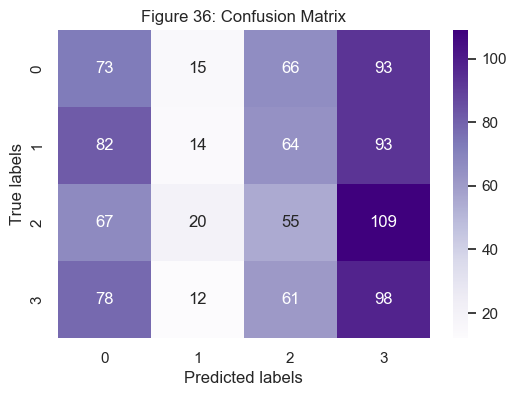

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.30      0.27       247
           1       0.23      0.06      0.09       253
           2       0.22      0.22      0.22       251
           3       0.25      0.39      0.31       249

    accuracy                           0.24      1000
   macro avg       0.24      0.24      0.22      1000
weighted avg       0.24      0.24      0.22      1000



In [216]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_predict = clf.predict(X_test)

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Figure 36: Confusion Matrix')
plt.show()

report = classification_report(y_test, y_predict)
print("Classification Report:")
print(report)

In [217]:
from sklearn.tree import DecisionTreeClassifier

DTree = DecisionTreeClassifier()

DTree.fit(X_train, y_train)

y_pred = DTree.predict(X_test)

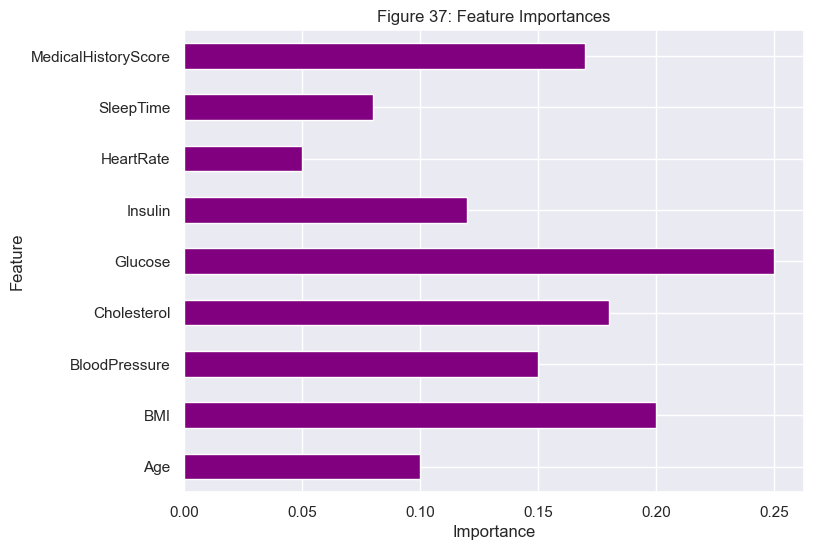

In [218]:
import pandas as pd
import matplotlib.pyplot as plt

index = ['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Glucose', 'Insulin', 'HeartRate', 'SleepTime', 'MedicalHistoryScore']

values = [0.1, 0.2, 0.15, 0.18, 0.25, 0.12, 0.05, 0.08, 0.17]

feature_importances = pd.Series(values, index=index)

plt.figure(figsize=(8, 6))
feature_importances.plot(kind='barh', title='Figure 37: Feature Importances', grid=True, color='purple')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [219]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.24247624 0.2379428  0.27333354 0.24039763 0.25550579 0.24029691
 0.22983949 0.25395515 0.27378224 0.25811439]

Final Average Accuracy of the model: 0.25


### SVC

In [220]:
healthcare_data.shape

(5000, 16)

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [222]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [223]:
y_pred = svc_model.predict(X_test)

In [224]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.25533333333333336


### Model Evaluation

### Confusion Matrix

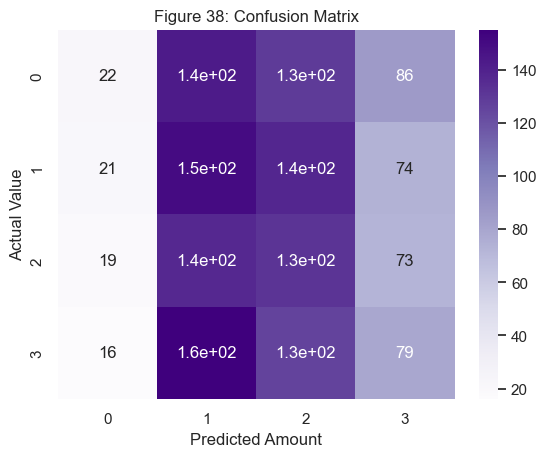

              precision    recall  f1-score   support

           0       0.28      0.06      0.10       380
           1       0.26      0.39      0.31       383
           2       0.25      0.37      0.30       361
           3       0.25      0.21      0.23       376

    accuracy                           0.26      1500
   macro avg       0.26      0.26      0.23      1500
weighted avg       0.26      0.26      0.23      1500



In [225]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap='Purples')

plt.title('Figure 38: Confusion Matrix')
plt.xlabel('Predicted Amount')
plt.ylabel('Actual Value')
plt.show()

print(classification_report(y_test, y_predict))

In [226]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 75  95 109 101]
 [ 83 115 101  84]
 [ 86  92 103  80]
 [ 90 107 103  76]]


In [227]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

svc = SVC()

grid_search = GridSearchCV(svc, param_grid, verbose=4)
grid_search.fit(X_train_scaled, y_train)

print("Best hyperparameters found:")
print(grid_search.best_params_)

grid_predictions = grid_search.predict(X_test_scaled)

cm = confusion_matrix(y_test, grid_predictions)

sns.heatmap(cm, annot=True)

print("Figure 21: Classification Report:")
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.250 total time=   0.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.233 total time=   0.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.266 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.260 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.256 total time=   0.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.260 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.250 total time=   0.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.257 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.263 total time=   0.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.260 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.251 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf


KeyboardInterrupt



In [ ]:
# SMOTE: Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input.
from collections import Counter
from imblearn.over_sampling import SMOTE 

print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
# find best hyper parameters
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Artificial Neural Networks

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
import numpy as np
import random
import tensorflow
tensorflow.random.set_seed(16)
np.random.seed(1)
random.seed(1)

In [ ]:
from keras.models import Sequential
model = Sequential()

In [ ]:
from keras.layers import Dense

model.add(Dense(32, activation = 'relu', input_dim = 14))

In [ ]:
model.add(Dense(16, activation = 'relu'))

In [ ]:
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 200)  

In [ ]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Predicting the test set results using your neural network model
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.5)

# Creating the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='Purples')

plt.title('Figure 38: Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

# Printing the classification report
print(classification_report(y_test, y_test_pred))

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

def unsupervised_learning(data, n_clusters=2, title=''):
    X = data.drop(columns=['Disease_Encoded'])

    kmeans = KMeans(n_clusters=n_clusters)

    kmeans.fit(X)

    data['Cluster'] = kmeans.labels_

    sns.pairplot(data, hue='Cluster', palette='Purples', vars=X.columns)
    plt.title('Figure 40: Pairplot of Clusters')  
    plt.show()

    return data

healthcare_data_clustered = unsupervised_learning(healthcare_data, title='Pairplot of Clusters')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histogram(data, column, bins=10):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=column, bins=bins, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
sns.histplot(healthcare_data['Age'], bins=20, color='Purple')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Figure 41: Histogram of Age')
plt.show()

In [ ]:
ax = sns.histplot(healthcare_data.Disease_Encoded, kde = True, color = 'Purple')
ax.set(xlabel = 'Disease', ylabel = 'Count', title = 'Figure 42: Disease Histogram')

In [ ]:
plt.hexbin(healthcare_data['SleepTime'], healthcare_data['SleepTime'], gridsize=15, cmap="Purples")
plt.title('Figure 43: SleepTime Distribution')

In [ ]:
plt.hexbin(healthcare_data['Cholesterol'], healthcare_data['Cholesterol'], gridsize=15, cmap="Purples")
plt.title('Figure 44: Cholesterol Distribution')

In [ ]:
plt.hexbin(healthcare_data['Glucose'], healthcare_data['Glucose'], gridsize=15, cmap="Purples")
plt.title('Figure 45: Glucose Distribution')

In [ ]:
plt.hexbin(healthcare_data['Insulin'], healthcare_data['Insulin'], gridsize=15, cmap="Purples")
plt.title('Figure 46: Insulin Distribution')

In [ ]:
plt.hexbin(healthcare_data['HeartRate'], healthcare_data['HeartRate'], gridsize=15, cmap="Purples")
plt.title('Figure 47: HeartRate Distribution')

In [ ]:
plt.hexbin(healthcare_data['Age'], healthcare_data['Age'], gridsize=15, cmap="Purples")
plt.title('Figure 48: Age Distribution')

In [ ]:
plt.hexbin(healthcare_data['BloodPressure'], healthcare_data['BloodPressure'], gridsize=15, cmap="Purples")
plt.title('Figure 49: BloodPressure Distribution')

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(healthcare_data.corr(), annot=True, cmap='Purples', fmt='.2f')
plt.title('Figure 52: Correlation Heatmap')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

size_columns = healthcare_data.head(30)

plt.figure(figsize=(10, 6))
sns.barplot(x='Disease_Encoded', y='StressLevel', data=size_columns, palette=['pink', 'grey', 'Purple', 'yellow'])
plt.title('Figure 53: Distribution of Disease vs StressLevel for the First 30 Rows')
plt.xlabel('Disease')
plt.ylabel('StressLevel')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

size_columns = healthcare_data.head(30)

plt.figure(figsize=(10, 6))
sns.barplot(x='Disease_Encoded', y='SleepTime', data=size_columns, palette=['pink', 'grey', 'Purple', 'yellow'])
plt.title('Figure 54:  Distribution of SleepTime vs Disease for the First 30 Rows')
plt.xlabel('Disease')
plt.ylabel('SleepTime')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

size_columns = healthcare_data.head(30)

plt.figure(figsize=(10, 6))
sns.barplot(x='Disease_Encoded', y='PhysicalActivity', data=size_columns, palette=['pink', 'grey', 'Purple', 'yellow'])
plt.title('Figure 55:  Distribution of PhysicalActivity vs Disease for the First 30 Rows')
plt.xlabel('Disease')
plt.ylabel('PhysicalActivity')
plt.show()

In [ ]:
sns.displot(healthcare_data['BMI'], color='Purple')

plt.title('Figure 56: BMI')
plt.show()

In [ ]:
sns.displot(healthcare_data['Cholesterol'], color='Purple')

plt.title('Figure 57: Cholesterol')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

sizes = healthcare_data['Disease_Encoded'].value_counts()

plt.figure(figsize=(4, 4))
sizes.plot(kind='pie', autopct='%1.1f%%',  colors=['pink', 'yellow', 'grey', 'Purple'])

plt.title('Figure 58: Disease Distribution')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

sizes = healthcare_data['Smoker'].value_counts()

plt.figure(figsize=(4, 4))
sizes.plot(kind='pie', autopct='%1.1f%%', colors=['Purple', 'grey'])

plt.title('Figure 59: Smoker Distribution')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

sizes = healthcare_data['StressLevel'].value_counts()

plt.figure(figsize=(4, 4))
sizes.plot(kind='pie', autopct='%1.1f%%', colors=['Purple', 'grey', 'pink'])

plt.title('Figure 60: StressLevel Distribution')

plt.show()

### Comparison of ML modelling outcomes using a Table or graph visualisation. 

In [ ]:

from sklearn.metrics import classification_report, accuracy_score

svc = SVC()
log_reg = LogisticRegression()
rfc = RandomForestClassifier()

models = [svc, log_reg, rfc]
model_names = ['SVC', 'Logistic Regression', 'Random Forest Classifier']

metrics_dict = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}

for model, name in zip(models, model_names):
    # Treinamento
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']

    metrics_dict['Model'].append(name)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1-score'].append(f1_score)

metrics_df = pd.DataFrame(metrics_dict)

print(metrics_df)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.bar(metrics_df['Model'], metrics_df['Accuracy'], color=['Purple', 'grey', 'pink'])

plt.title('Figure 61: Accuracy by Model', size=16)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.xticks(rotation=45)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

accuracy_values = metrics_df['Accuracy']
precision_values = metrics_df['Precision']
recall_values = metrics_df['Recall']

bar_width = 0.2

index = np.arange(len(metrics_df['Model']))

plt.figure(figsize=(10, 6))

plt.bar(index, accuracy_values, bar_width, label='Accuracy',  color='Purple')
plt.bar(index + bar_width, precision_values, bar_width, label='Precision',  color='pink')
plt.bar(index + 2*bar_width, recall_values, bar_width, label='Recall',  color='grey')

plt.title('Figure 62: Performance Metrics by Model', size=16)
plt.xlabel('Models', size=14)
plt.ylabel('Score', size=14)
plt.xticks(index + bar_width, metrics_df['Model'])
plt.legend()

plt.show()

## Statistical summary and short inferences:

In [ ]:
import scipy.stats as stats

def plot_qq(column):
    data = healthcare_data[column].dropna()
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f' Figure : Q-Q Plot to Check Normality of {column}')
    plt.show()

plot_qq('Age')

In [ ]:
import scipy.stats as stats

def plot_qq(column):
    data = healthcare_data[column].dropna()
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Figure : Q-Q Plot to Check Normality of {column}')
    plt.show()

plot_qq('HeartRate')

In [ ]:
import scipy.stats as stats

def plot_qq(column):
    data = healthcare_data[column].dropna()
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Figure : Q-Q Plot to Check Normality of {column}')
    plt.show()

plot_qq('BMI')

#### Numerical Features

Age: the data show a positively asymmetrical distribution and age has been shown to be between 35 and 65 years with a mean age of 48.8 with a variance of around 18%.

BMI: the data is positively asymmetrical, with a low standard deviation and a good sample for analyzing the data.

Blood Pressure: the average blood pressure was around 129 and could reach a maximum of 179.
Cholesterol: showed a wide range between 100 and 299 with a mean of around 199. With a mode of around 199.61% 

Glucose: showed a large variation between the average deviation of around 47% and could reach a maximum of 582.

Insulin: had the highest variance among the data with 82% variation, which shows that it is difficult to explain the data more precisely or try to predict something.

HeartRate: The data is positively asymmetrical and returned a good standard deviation of 14%, with an average of 80 and a maximum of 198, which shows that the index is high.

SleepTime: The average person slept around 7 hours, with a minimum of 4 hours and a maximum of 11.

MedicalHistoryScore: it is a range between 4.48% and 9%.


#### Categorical Features

Smoker: showed 50% for 0 non-smokers; and 1 for smokers with the other half.

PhysicalActivity: has a similar distribution for medium, High Low level of those who do physical activity.

IncomeLevel: also appears with all 3 categories around 1659 and with a balance between classes 0, 1 and 2.

StressLevel: also similar between the 3 categories.

HealthIns: 50.12% have Health Insurance

Disease: there is a balance between classes A, B, C and Unknown with around 25% for each.

Upon cross-referencing the provided feature descriptions with the histograms of the continuous features, everything seems consistent and falls within the expected ranges. Among the continuous variables, there are no noticeable outliers or implausible values.

### Why selected those variables?
#### I have choose categoricals variables because the continuous would be hard to understand a pattern of probability of who has a type of Disease and at the same time Health Insurance.

HealthIns 0 represents Yes and 1 No.
Disease A = 0
Disease B = 1
Disease C = 2
Disease D = 3

In [ ]:
import statistics as stats
from scipy.stats import binom

In [ ]:
cross_tab = pd.crosstab(index=healthcare_data['Smoker'], columns=healthcare_data['HealthIns'])

print(cross_tab)

### Who has the Insurance and Non Smoker?

In [ ]:
(1270 / 2506)

In [ ]:
binom.cdf(k =50 , n = 100  , p = 0.5067) 

### Calculating probability between 70 and 100 inclusive, it was substract from P(x=<100) - P(x=<29):

In [ ]:
binom.cdf(k =70 , n = 100 , p = 0.5067) - binom.cdf(k =29 , n = 100 , p = 0.5067)

### Calculate probability between 50 and 80 inclusive, it was substract from P(x=<80) - P(x=<49):

In [ ]:
binom.cdf(k =80 , n = 100 , p = 0.5067) - binom.cdf(k =49 , n = 100 , p = 0.5067)

### Probabilities Disease_Encoded and Smoker

In [ ]:
cross_tab = pd.crosstab(index=healthcare_data['Disease_Encoded'], columns=healthcare_data['Smoker'])

print(cross_tab)

### Who are Smoker and has the Disease 2?

In [ ]:
( 627 / 2448)

### Calculating probability between 50 and 150 inclusive, it was substract from P(x=<150) - P(x=<49):

In [ ]:
binom.cdf(k =150 , n = 200 , p = 0.2561) - binom.cdf(k =49 , n = 200 , p = 0.2561)

### Calculating probability between 50 and 100 inclusive, it was substract from P(x=<100) - P(x=<49):

In [ ]:
binom.cdf(k =100 , n = 200 , p = 0.2561) - binom.cdf(k =49 , n = 200 , p = 0.2561)

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [257]:
column_names = healthcare_data.columns.tolist()
print(column_names)

['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Glucose', 'Insulin', 'HeartRate', 'Smoker', 'PhysicalActivity', 'SleepTime', 'MedicalHistoryScore', 'IncomeLevel', 'StressLevel', 'HealthIns', 'Disease_Encoded', 'Cluster']


In [258]:
from scipy.stats import f_oneway

def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists = [inpData[inpData[TargetVariable] == category][predictor] for category in inpData[TargetVariable].unique()]
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    return SelectedPredictors

In [259]:
ContinuousVariables=['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'Glucose', 'Insulin', 'HeartRate', 'SleepTime', 'MedicalHistoryScore']
FunctionAnova(inpData=healthcare_data, TargetVariable='Disease_Encoded', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Age is NOT correlated with Disease_Encoded | P-Value: 0.6933612702411478
BMI is NOT correlated with Disease_Encoded | P-Value: 0.17549701951687935
BloodPressure is NOT correlated with Disease_Encoded | P-Value: 0.9719707032752248
Cholesterol is NOT correlated with Disease_Encoded | P-Value: 0.8945667809848713
Glucose is NOT correlated with Disease_Encoded | P-Value: 0.06466531887553585
Insulin is NOT correlated with Disease_Encoded | P-Value: 0.7299404000650758
HeartRate is NOT correlated with Disease_Encoded | P-Value: 0.17737871280259324
SleepTime is NOT correlated with Disease_Encoded | P-Value: 0.19110454453875295
MedicalHistoryScore is NOT correlated with Disease_Encoded | P-Value: 0.42857536352027104


[]

### Hypothesis:

In [228]:
healthcare_data.describe()

Age          BMI  BloodPressure  Cholesterol      Glucose  \
count  5000.000000  5000.000000    5000.000000  5000.000000  5000.000000   
mean     48.805600    27.332873     129.749053   199.611158   137.440600   
std      17.906991     7.008076      27.945382    56.700345    47.448072   
min      18.000000    15.000291      80.000000   100.000000    70.000000   
25%      34.000000    21.398311     106.000000   151.000000   103.000000   
50%      49.000000    27.332873     129.749053   199.611158   136.000000   
75%      64.000000    33.181997     154.000000   247.000000   167.000000   
max      79.000000    39.988943     179.000000   299.000000   582.000000   

           Insulin    HeartRate       Smoker  PhysicalActivity    SleepTime  \
count  5000.000000  5000.000000  5000.000000       5000.000000  5000.000000   
mean    146.573200    80.342000     0.510400          1.003600     7.482200   
std      82.623127    13.914919     0.499942          0.806546     2.281562   
min      15.000000    60.000000     0.000000          0.000000     4.000000   
25%      78.000000    70.000000     0.000000          0.000000     5.000000   
50%     144.000000    80.000000     1.000000          1.000000     7.000000   
75%     213.000000    89.000000     1.000000          2.000000     9.000000   
max     744.000000   198.000000     1.000000          2.000000    11.000000   

       MedicalHistoryScore  IncomeLevel  StressLevel    HealthIns  \
count          5000.000000  5000.000000  5000.000000  5000.000000   
mean              4.485400     0.995800     0.986000     0.501200   
std               2.852405     0.817506     0.815069     0.500049   
min               0.000000     0.000000     0.000000     0.000000   
25%               2.000000     0.000000     0.000000     0.000000   
50%               4.000000     1.000000     1.000000     1.000000   
75%               7.000000     2.000000     2.000000     1.000000   
max               9.000000     2.000000     2.000000     1.000000   

       Disease_Encoded      Cluster  
count      5000.000000  5000.000000  
mean          1.503200     4.034400  
std           1.118141     2.847883  
min           0.000000     0.000000  
25%           1.000000     1.000000  
50%           1.500000     5.000000  
75%           3.000000     7.000000  
max           3.000000     9.000000

### BloodPressure:

In [252]:
from statsmodels.stats import weightstats

X = healthcare_data['BloodPressure']
mu = 125

In [256]:
z_score, p_value = weightstats.ztest(X, value = mu, ddof = 1, alternative = 'two-sided')
z_score

12.016609205876323

#### As I know the Sigma the std of the population, then we can go through with the Degrees of freedom:

#### H0: mu = 125 // H1: mu > 125
#### mu = 25 (defining the population average)

In [255]:
p_value

2.906557094085278e-33

As the p_value is greater than alpha(0.05%) we accept the null hypothesis
We area firming that at a 5% of significance level, we have evidence to say that the average of BloodPressure is around 125

### Cholesterol

Creating a hypothesis test for CHolesterol and creating a scenario that the average is greater than 160:

H0: mu = 160 // H1: mu > 160

In [264]:
mu1 = 140

In [265]:
z_score1, p_value1 = weightstats.ztest(X, value = mu1, ddof = 1, alternative = 'larger')
z_score1

-25.938147683860592

In [266]:
p_value1

1.0

we accept the hypothesis because the p_value is greater than alpha

### Blood Pressure:

#### Creating a scenario that we wanna know if the BloodPressure average of the population is around 100

In [274]:
from scipy import stats

mu2 = 100

In [275]:
t_score, p_value2 = stats.ttest_1samp(X, mu2)
t_score

75.27453735543784

In [276]:
p_value2 

0.0

#### At a 5% of significance level we have enough results that the average is smaler than alpha, so we reject it

In [ ]:
#ACRESCENTAR NA EXPLICACAO?
#A validação cruzada, ou cross-validation, é uma técnica usada para avaliar o desempenho de modelos de 
#aprendizado de máquina. Ela envolve dividir o conjunto de dados em partes chamadas "folds", treinando o
#modelo em algumas dobras e testando-o em outras. Isso é repetido várias vezes para obter uma estimativa robusta 
#do desempenho do modelo. A validação cruzada é aplicada quando se deseja uma avaliação mais confiável do modelo,
#especialmente em conjuntos de dados pequenos.

In [ ]:
healthcare_data.describe()

In [ ]:
healthcare_data.info()

In [ ]:
#Inferential:

In [ ]:
# We assume as normal distirbution our data, if not normal the analise could not be inplace, becasue we need to visualize the data to prodict something about the population, if not so is hard to understand the proximately of reality

In [ ]:
# higher confidence level such 95% or 99%, but if nothing is said or guide we assume 5%, very short margim of error when we are # dealing with health data for example, smaller margin of error is the best!

In [ ]:
# t-of Student > the difference between normal distribution is that it has degrees of freedom
# degrees of freedom = how many variables to take to calculate the standard deviation

In [ ]:
# why we are calculate the Interval and not the exact value?
# first of all we are not calculating the main value<<<<<<<<<<<<<<<<<<<<<<
# (i will not know the X bar) just the which values you expect your Mu to between the interfal

In [ ]:
# alpha = margim of error
alpha = x
c = 1- X

In [ ]:
# calculating to find Mu when the Standard deviation of the population is KNOWn

In [ ]:
# if we have normal data we can move on, if we know the population(SIGMA)/standard deviation = we use normal distribution


n = 500 (sample=number of observations)
x bar = 2000 (average) mean
sigma 3000(population)
what is the average salary of all emplyes? Mu
alpha = 5%

then now we can create the confidence interval

In [ ]:
# xbar - our sex * sigma
LL = 2000 - (1,96 *3000/(500 ** 0.05))
LL

In [ ]:
# uL=  2000 + (1,96 *3000/(500 ** 0.05))
UL

In [ ]:
#We can use the code for normal distribution confidence intervals

n = 500
sample_mean = 2000
std/sigma = 300
alpha = 0.05

In [ ]:
confidence_interval = st.norm.interval(confidence = 1 - alpha, loc = sample_mean, scale = sigma/np.sqrt(n))
confidence_interval

### Confidence Intervals when sigma/standard deviation (std) is unknown --> Student's T dist

In [ ]:
# are most of the cases
# WITHOUT POPULATION DATA WE WORK WITH STUDENTS T

In [ ]:

LL = 250 - (2.18 * 25/(299 **0.5))
LL


In [ ]:

UL = 250 + (2.18 * 25/(299 **0.5))
UL

In [ ]:
#We can use the code for normal distribution confidence intervals

n1 = 300(299 v) observations
sample_mean1 = 250
std = 25
alpha1 = 0.03

In [ ]:
confidence_interval1 = st.t.interval(confidence = 1 - alpha1, df= n1-1, loc = sample_mean1, scale = std/np.sqrt(n1-1))
confidence_interval1

# pay attention we are using the t on the formula, differente than the other above.
# and instead the sigma will be the std deviation (std/np.sqrt(n1-1)))
# df = degrees of freedom

In [ ]:
############# with dataset

In [ ]:
# we want to estimate the real average charges of this clientes:(insurance dataset):

In [ ]:
# x=charges of these clientes in euros

In [ ]:
X = dataset.iloc[:,2].values

In [ ]:
# if we dont have the alpha we assume 0.95% when doing confidence intervals

In [ ]:
##               11.04 CLASS

In [ ]:
# The average age of the customers is 41 years old. Between the first and the third quartile the customers 
# are in a range of  33 to 49 years old. This is a reflection of the Bank operating mostly with mature 
# people. This information is relevant to determining the type of campaign more appropriate for this 
# segment. 

In [ ]:
# Hypotehesis Test
# P-Value

# basically we test to see if its true or not

# hypothesis we have Parametric test and Non-Parametric test

# we want to test Mu and Sigma that are parameters

# there are some 

In [ ]:
# if the data is not normally distributed we are not relaiable with parameters, we have to use 
# another metric that not affect the extreme values

#other metric that doesnt affect extremely values are the median and the mode

In [ ]:
# Hypotehesis Test:
# first of all defyne our hypothesis is
# always H0 will be NULL HYPHOTESIS          
# doesnt matter what the dataset says, or shows always will be H0 for NULL H0=mu
# always mu is = to something

H0: mu =
H1: mu >
    mu <
    mu =!

In [ ]:
when SIgma is known = some case we have the data from the population other not 
we know the population

most time we dont know the data form the population.

(x barra") representa a média amostral. É

In [ ]:
mu
n
x bar
alpha 0.05?
SIGMA: std OF THE POPULATION
    
    which I will used? normal distribution OR T distribution?
    
    I will use sigma, because we have the std from the POPULATION
    BUT
    I will use sigma, when we have std deviation from the SAMPLE
    

In [ ]:
Step 1: define the Hypothesis
H0= mu = 275
H1: mu = less 275(pay attention on the signal)
    
Step 2: formula
which I will used? normal distribution OR T distribution? 
I will use sigma, because we have the std from the POPULATION
   BUT
I will use sigma, when we have std deviation from the SAMPLE
    
step 3: critical values

In [ ]:
ALWAYS:
IF X BAR LESS THAN MU ======= H1 WILL BE LESS
IF THE X BAR GREATER MU ======== H1 MORE

THEN IS LIKE A DOUBLE CHECK TO DEFINE AS THE ABOVE:
    H1: mu = less 275(pay attention on the signal)

In [ ]:
# if more we accept?yeah

In [ ]:
when SIgma is unknown =

mu
n
x bar
alpha 0.05?
S: std OF THE SAMPLE (T-Student)

H0: mu = 6
H1: mu > 6
    
double check X bar is greater than MU, then is greater the H1(hypothesis)

THE CRITICLA VALUES WILL BE RETURNING WHERE IS MY REJECTION ZONE 1.76....-1,54...

DEGREE OF FREEDOM PARA A CALCULADORA = N-1


THE 5% SHOULD BE AROUND THE RANGE OF THE MEAN

In [ ]:
# WHAT DO WE WANT TO SEE?
1) WE ANALYZE WHAT IS THE MEAN OF THE SAMPEL AND TRY TO MAKE A DECISION TO SET OUR HYPOTHESIS. WE CAN DO RESEARCH AND CHECK HOW MUCH STARTUPS ARE SPENDING IN ADMINISTRATION IN THE AREA, SO WE CAN HAVE A PARAMETER. OR WE CAN SET +-5% OF THE SAMPLE MEAN, TRYING TO SEE WHETHER THE MU VALUE IS IN THAT RANGE.
2) 
3) 
4) 

In [ ]:
healthcare_data.describe

In [ ]:
numeric_cols = healthcare_data.select_dtypes(include=[np.number]).columns
mean_values = healthcare_data[numeric_cols].mean()

print(mean_values)

In [ ]:
median = np.median(healthcare_data)
median

In [ ]:
mode = stats.mode(healthcare_data)
mode